### Imports

In [88]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import matplotlib.pyplot as plt
from copy import deepcopy


### Create directory for file storage and clear previously stored files

In [89]:
image_store_path = "../img"
if not os.path.exists(image_store_path):
    os.makedirs(image_store_path)

### Read dataset

In [90]:
df = pd.read_csv("../data/children anemia.csv")
print(*df.columns, sep="\n")

Age in 5-year groups
Type of place of residence
Highest educational level
Wealth index combined
Births in last five years
Age of respondent at 1st birth
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)
Anemia level
Have mosquito bed net for sleeping (from household questionnaire)
Smokes cigarettes
Current marital status
Currently residing with husband/partner
When child put to breast
Had fever in last two weeks
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
Anemia level.1
Taking iron pills, sprinkles or syrup


### Basic dataset information

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [92]:
df.describe(include='all')

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
count,33924,33924,33924,33924,33924.000000,33924.000000,13136.000000,13136,33924,33924,33924,32226,21168,30713,10182.000000,10182,30713
unique,7,2,4,5,NaN,NaN,NaN,4,2,2,6,2,41,3,NaN,4,3
top,25-29,Rural,No education,Poorest,NaN,NaN,NaN,Not anemic,Yes,No,Married,Living with her,Immediately,No,NaN,Moderate,No
freq,9470,22225,15391,8066,NaN,NaN,NaN,5337,24016,33852,31222,29619,9351,23065,NaN,3927,25358
mean,NaN,NaN,NaN,NaN,1.823783,19.570776,114.367235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.270183,NaN,NaN
std,NaN,NaN,NaN,NaN,0.705460,4.313172,15.915408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.569583,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,16.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN


#### Requirement by Prof : Minimum 2K rows after removing null and duplicate rows

### Check requirements for dataset size

In [93]:
# Count non-null rows for each column
print(len(df) - df.isna().sum())
# OR its alias
# print(len(df) - df.isnull().sum())


Age in 5-year groups                                                     33924
Type of place of residence                                               33924
Highest educational level                                                33924
Wealth index combined                                                    33924
Births in last five years                                                33924
Age of respondent at 1st birth                                           33924
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    13136
Anemia level                                                             13136
Have mosquito bed net for sleeping (from household questionnaire)        33924
Smokes cigarettes                                                        33924
Current marital status                                                   33924
Currently residing with husband/partner                                  32226
When child put to breast                            

In [94]:
# Check if any column will have <10K rows after removing null rows.
print(any(len(df) - df.isnull().sum() < 10000))

False


In [95]:
# Check percent of rows are null rows for each column.
print((100 * df.isnull().sum()/len(df)))

Age in 5-year groups                                                      0.000000
Type of place of residence                                                0.000000
Highest educational level                                                 0.000000
Wealth index combined                                                     0.000000
Births in last five years                                                 0.000000
Age of respondent at 1st birth                                            0.000000
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    61.278151
Anemia level                                                             61.278151
Have mosquito bed net for sleeping (from household questionnaire)         0.000000
Smokes cigarettes                                                         0.000000
Current marital status                                                    0.000000
Currently residing with husband/partner                                   5.005306
When

### DATA CLEANING/PROCESSING I: Drop null rows

In [96]:
# Drop null rows for the predictor.
df.dropna(subset=['Anemia level.1'], inplace=True)
df.shape

(10182, 17)

### DATA CLEANING/PROCESSING II: Drop duplicate rows

In [97]:
# Drop duplicate rows
df = df.dropna(subset=['Anemia level.1']).drop_duplicates()
df

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
5,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,NaN,No,119.0,Not anemic,No
6,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Mild,Yes
9,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes
12,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,Living with her,Days: 1,No,109.0,Mild,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33918,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,108.0,Mild,Yes
33919,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
33920,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
33921,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No


In [98]:
# Check if any column will have <10K rows after removing anull and duplicates.
print(any(len(df) - df.isnull().sum() < 10000))

True


### EDA I: Check dataset size after dropping null and duplicate values

In [99]:
# Check which columns will have <10K rows after removing null and duplicates.
print(len(df) - df.isnull().sum())


Age in 5-year groups                                                     10171
Type of place of residence                                               10171
Highest educational level                                                10171
Wealth index combined                                                    10171
Births in last five years                                                10171
Age of respondent at 1st birth                                           10171
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    10051
Anemia level                                                             10051
Have mosquito bed net for sleeping (from household questionnaire)        10171
Smokes cigarettes                                                        10171
Current marital status                                                   10171
Currently residing with husband/partner                                   9653
When child put to breast                            

In [100]:
# Columns which are under <10k rows after removing null and duplicates
print(*df.columns[len(df) - df.isnull().sum() < 10000], sep="\n")



Currently residing with husband/partner
When child put to breast


### Rename features

Column names or feature names in the dataset are pretty broad to be used regularly, thus we rename them to suitable formats.

In [101]:
# Map the old column names to new short names
rename = {
    'Age in 5-year groups' : 'age_group', 
    'Type of place of residence' : 'residence',
    'Highest educational level' : 'education', 
    'Wealth index combined' : 'wealth',
    'Births in last five years' : 'past_births', 
    'Age of respondent at 1st birth' : '1stbirth_age',
    'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)' : 'adj_hemo_altsmoke',
    'Anemia level' : 'anemia_level',
    'Have mosquito bed net for sleeping (from household questionnaire)' : 'net_available',
    'Smokes cigarettes' : 'is_smoker', 
    'Current marital status' : 'marital_status',
    'Currently residing with husband/partner' : 'partner_coliving', 
    'When child put to breast' : 'breastfed',
    'Had fever in last two weeks' : 'fever_history',
    'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)' : 'adj_hemo_alt',
    'Anemia level.1' : 'anemia_level1', 
    'Taking iron pills, sprinkles or syrup' : 'ironpill_taken'
}

In [102]:
# Rename the columns
df = df.rename(columns=rename)

### EDA II: Check unique values for each column

Helps to find out `nan` values and one-hot encoding later. 

In [103]:
# Check unique values for each columns
fill_nan_cols = []
col_uniq_vals = {}
for col in df.columns:
    uniq_vals = df[col].unique()
    print(f"{col} : {uniq_vals}")
    col_uniq_vals[col] = uniq_vals
    if any(math.isnan(i) for i in uniq_vals if not isinstance(i, str)):
        fill_nan_cols.append(col)

age_group : ['25-29' '30-34' '35-39' '20-24' '15-19' '45-49' '40-44']
residence : ['Urban' 'Rural']
education : ['Secondary' 'Higher' 'No education' 'Primary']
wealth : ['Richest' 'Richer' 'Poorer' 'Middle' 'Poorest']
past_births : [1 2 3 4 6]
1stbirth_age : [25 30 32 19 24 22 23 20 14 26 33 16 18 17 27 21 15 28 12 13 29 35 31 34
 37 39 38 36 40 45 43 42 41]
adj_hemo_altsmoke : [ 95. 113. 121. 108. 116. 118. 134. 109. 101. 129. 132. 142. 133. 138.
 143. 137. 146. 119.  98. 122. 124.  87. 123. 128. 114. 107. 115. 147.
 125.  96. 127. 106. 110. 103. 151.  74. 105. 112. 135. 120. 100.  94.
 126. 111. 141.  91. 102.  89. 131.  99. 117. 136.  90. 104. 130.  83.
  65. 140.  62. 139. 149.  93. 145. 152.  86.  81.  82.  88.  84.  80.
  79. 156.  92. 144.  97.  70. 150.  20.  nan  52.  72.  75.  69.  73.
  54.  78. 148.  85. 153. 154.  76. 157. 167.  68.  61.  55.  77.  64.
  27. 158.  66. 161. 166.  60. 160.  63. 165.  57.  71. 159.  67. 164.
  56.  59.  43. 218. 162.]
anemia_level : ['Moderat

### DATA CLEANING/PROCESSING III: Fill null values for `adj_hemo_altsmoke` feature

In [104]:
# Check for which columns nan values need to be filled up
print(*fill_nan_cols, sep="\n")

adj_hemo_altsmoke
anemia_level
partner_coliving
breastfed


In [105]:
df["adj_hemo_altsmoke"].fillna(df["adj_hemo_altsmoke"].mean())

3         95.0
5        113.0
6        121.0
9        108.0
12       116.0
         ...  
33918    120.0
33919    120.0
33920    120.0
33921    149.0
33922    123.0
Name: adj_hemo_altsmoke, Length: 10171, dtype: float64

### EDA III: Univariate Analysis

#### Check age group distribution 

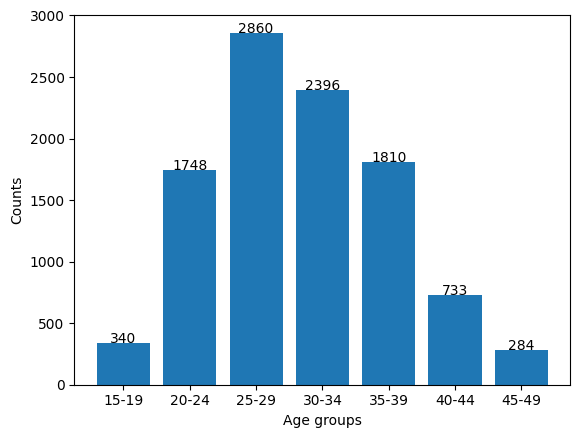

In [106]:
data = df['age_group'].value_counts().reset_index(name='counts').sort_values('age_group')
# print(data)
#   age_group  counts
# 5     15-19     340
# 3     20-24    1748
# 0     25-29    2860
# 1     30-34    2396
# 2     35-39    1810
# 4     40-44     733
# 6     45-49     284

fig, ax = plt.subplots()
bars = ax.bar(data['age_group'], data.counts)
plt.xlabel('Age groups')
plt.ylabel('Counts')
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.savefig("../img/univar_age_group_count.png", dpi=300)
plt.show()

#### Check residence type distribution



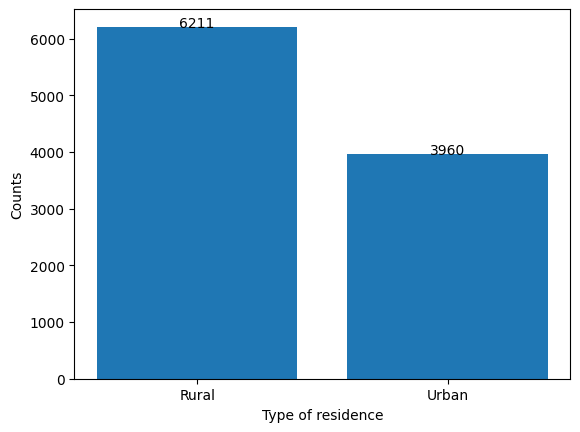

In [107]:
data = df['residence'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['residence'],data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Type of residence')
plt.ylabel('Counts')
plt.savefig("../img/univar_resident.png", dpi=300)
plt.show()

#### Check education distribution



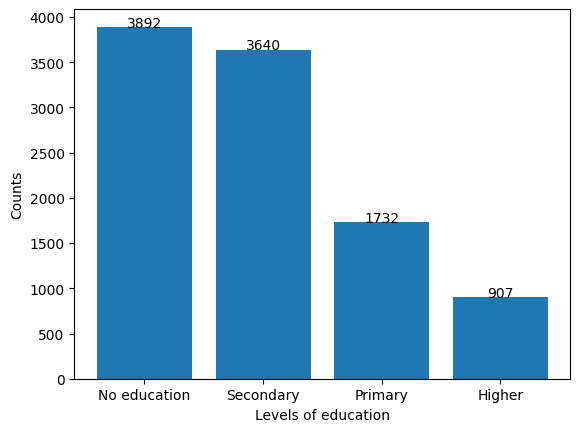

In [108]:
data = df['education'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['education'],data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Levels of education')
plt.ylabel('Counts')
plt.savefig("../img/univar_education.png", dpi=300)
plt.show()

#### Check wealth type distribution



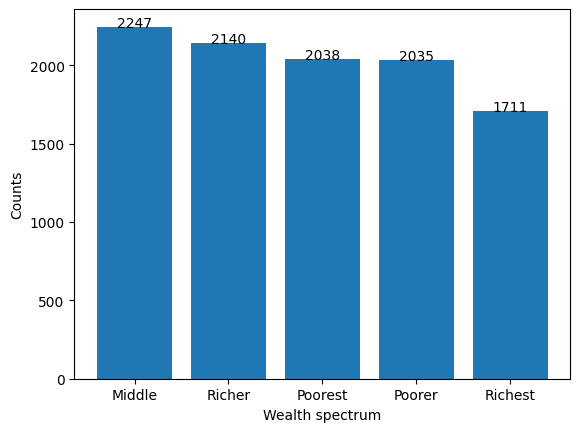

In [109]:
data = df['wealth'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['wealth'],data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Wealth spectrum')
plt.ylabel('Counts')
plt.savefig("../img/univar_wealth.png", dpi=300)
plt.show()

#### Check counts of birth in last five years



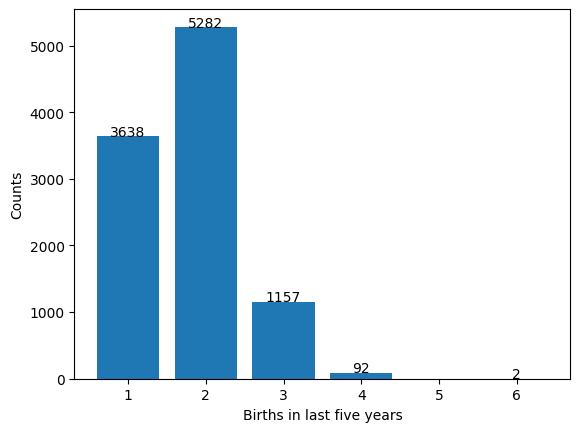

In [110]:
data = df['past_births'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['past_births'],data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Births in last five years')
plt.ylabel('Counts')
plt.savefig("../img/univar_past_births.png", dpi=300)
plt.show()

#### Check mosquito bed net availability

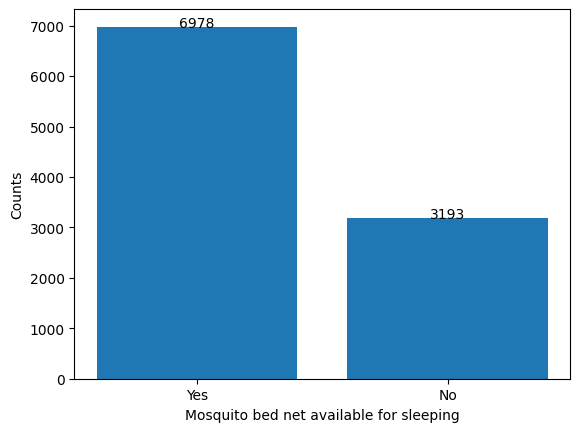

In [111]:
data = df['net_available'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['net_available'], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )


plt.xlabel('Mosquito bed net available for sleeping')
plt.ylabel('Counts')
plt.savefig("../img/univar_netavailable.png", dpi=300)
plt.show()

#### Check smoking habit

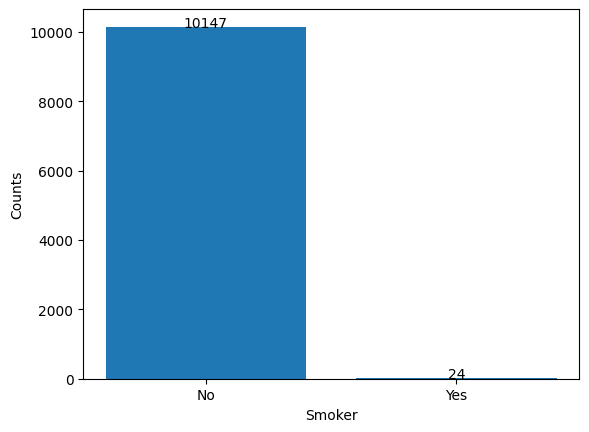

In [112]:
data = df["is_smoker"].value_counts().reset_index(name="counts")
fig, ax = plt.subplots()

bars = ax.bar(data["is_smoker"], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel("Smoker")
plt.ylabel("Counts")
plt.savefig("../img/univar_smoker.png", dpi=300)
plt.show()

#### Check current marital status

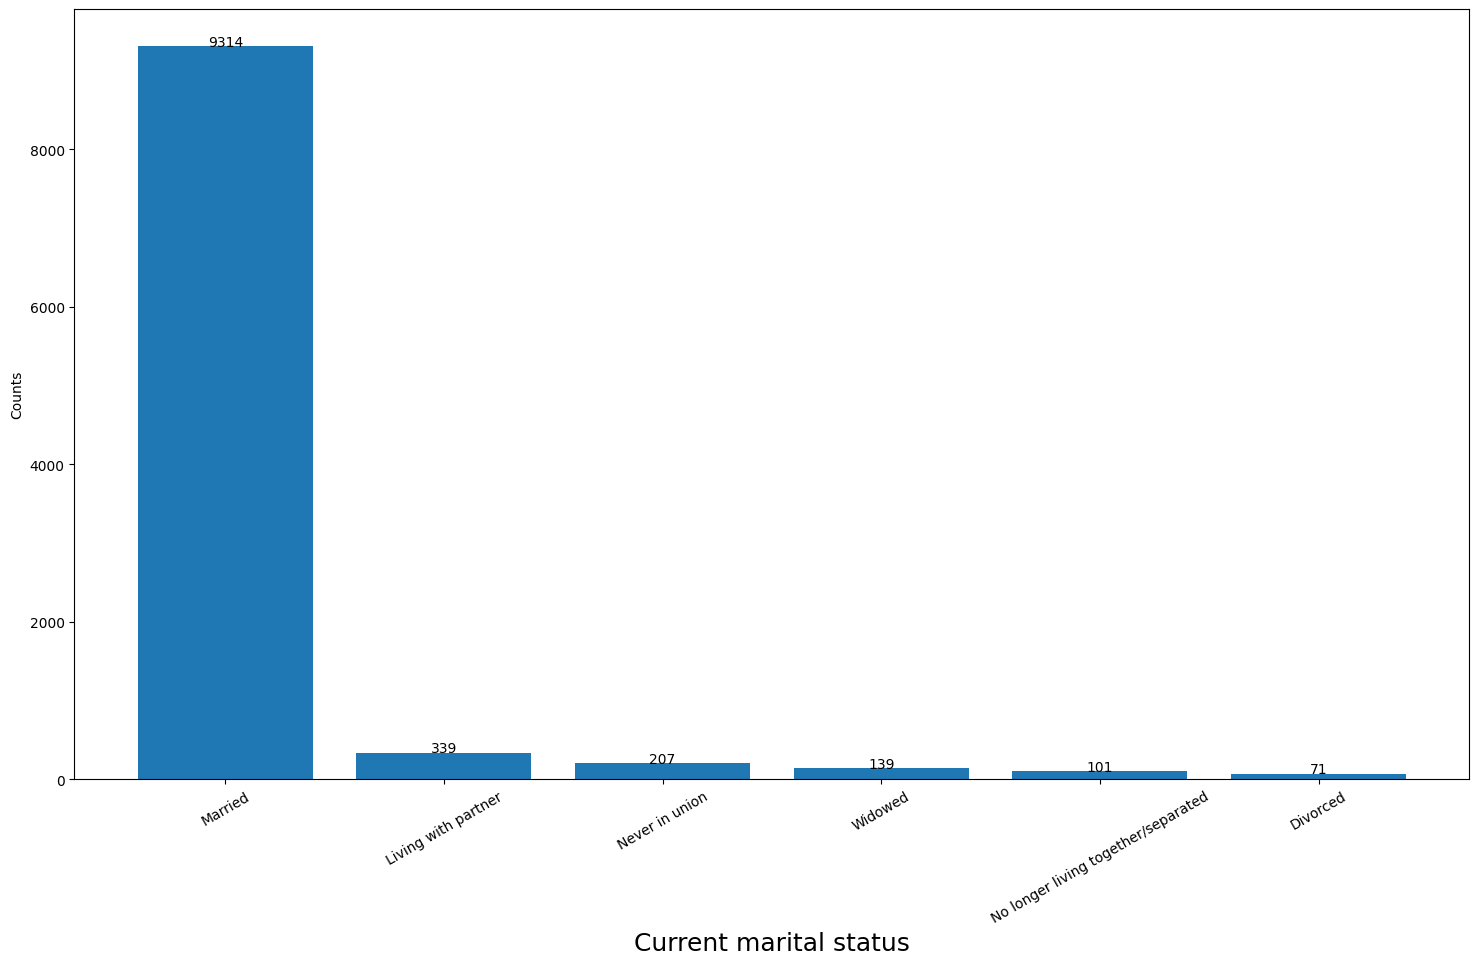

In [113]:
data = df['marital_status'].value_counts().reset_index(name='counts')
# plt.figure(figsize=(16, 10))
fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(data['marital_status'], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )
plt.xticks(rotation=30)
plt.xlabel('Current marital status', fontsize=18)
plt.ylabel('Counts')
plt.savefig("../img/univar_marital_status.png", dpi=300)
plt.show()

#### Check whether mothers currently residing with husband/partner

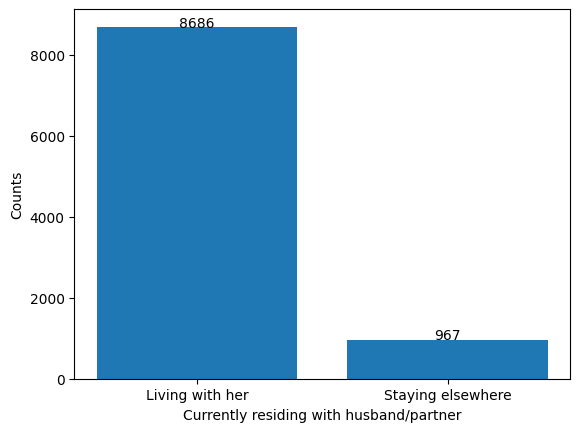

In [114]:
data = df["partner_coliving"].value_counts().reset_index(name="counts")
fig, ax = plt.subplots()

bars = ax.bar(data["partner_coliving"], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel("Currently residing with husband/partner")
plt.ylabel("Counts")
plt.savefig("../img/univar_partner_coliving.png", dpi=300)
plt.show()

#### Check whether children had fever in last two weeks

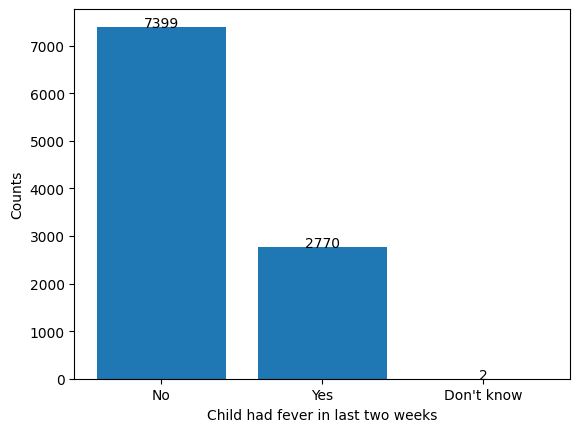

In [115]:
data = df['fever_history'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['fever_history'], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Child had fever in last two weeks')
plt.ylabel('Counts')
plt.savefig("../img/univar_fever_history.png", dpi=300)
plt.show()

#### Check whether child is taking iron pills, sprinkles or syrup

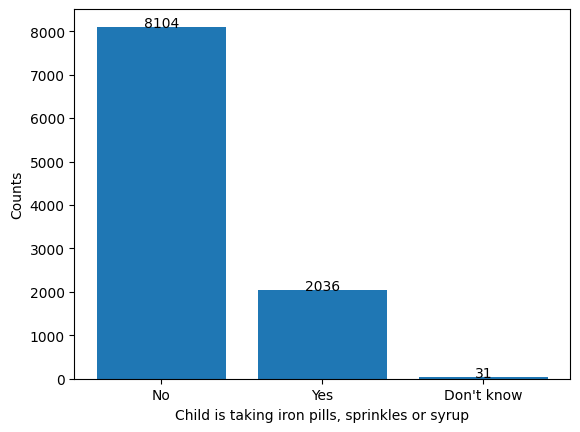

In [116]:
data = df['ironpill_taken'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()

bars = ax.bar(data['ironpill_taken'], data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )

plt.xlabel('Child is taking iron pills, sprinkles or syrup')
plt.ylabel('Counts')
plt.savefig("../img/univar_ironpill_taken.png", dpi=300)
plt.show()

#### Check age of respondent at 1st birth

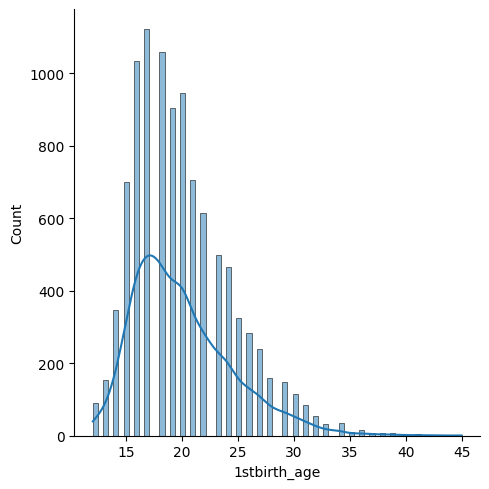

In [117]:
birst1_ageplot = sns.displot(df['1stbirth_age'], kde=True)
birst1_ageplot.savefig("../img/univar_1stbirth_age.png")

#### Check distribution of hemoglobin level adjusted for altitude

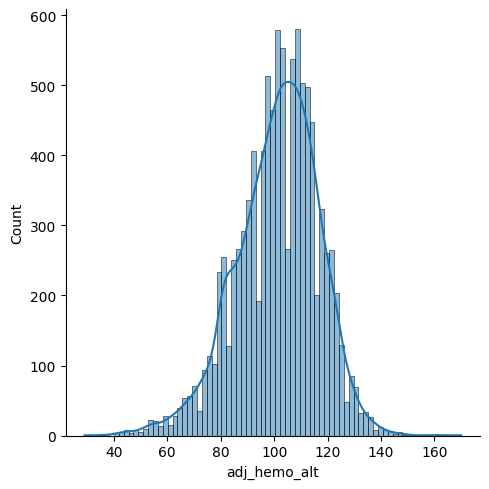

In [118]:
adj_hemoalt_plot = sns.displot(df['adj_hemo_alt'], kde=True)
adj_hemoalt_plot.savefig("../img/univar_adj_hemoalt.png")

#### Check distribution of hemoglobin level adjusted for altitude and smoking

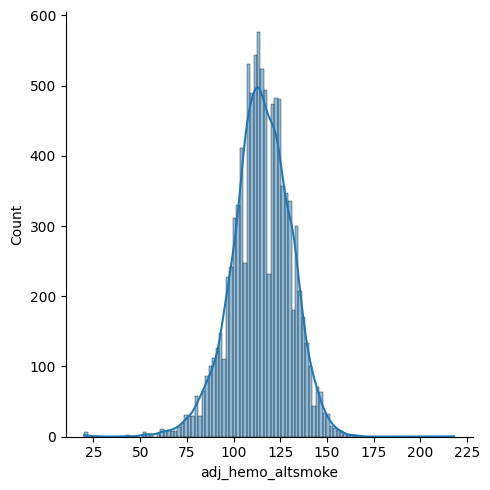

In [119]:
adj_hemoaltsmk_plot = sns.displot(df['adj_hemo_altsmoke'], kde=True)
adj_hemoaltsmk_plot.savefig("../img/univar_adj_hemoaltsmk.png")

### EDA IV: Multivariate Analysis : Correlation

#### Check correlation among numeric columns

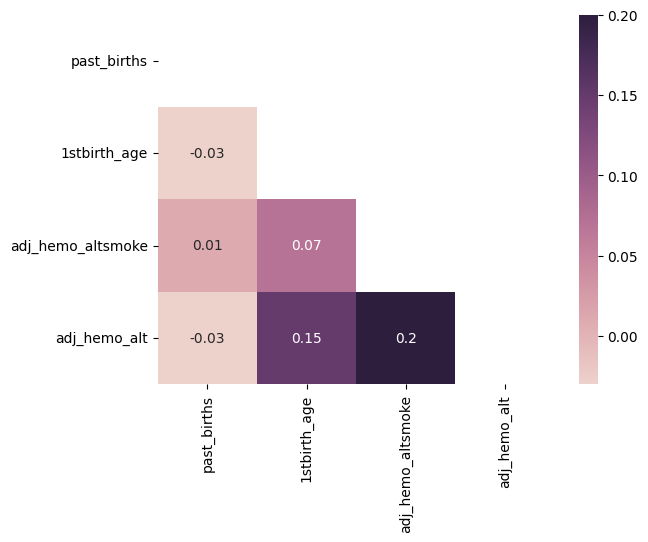

In [120]:
corr = df.select_dtypes('number').corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
k = sns.cubehelix_palette(as_cmap=True)

# sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1)
sns.heatmap(corr, mask=mask, annot=True, cmap=k)
plt.savefig("../img/multivar_numcorrmat.png", dpi=400)
plt.show()

### EDA V: Multivariate Analysis : Countplots

#### Countplots based on anemia level

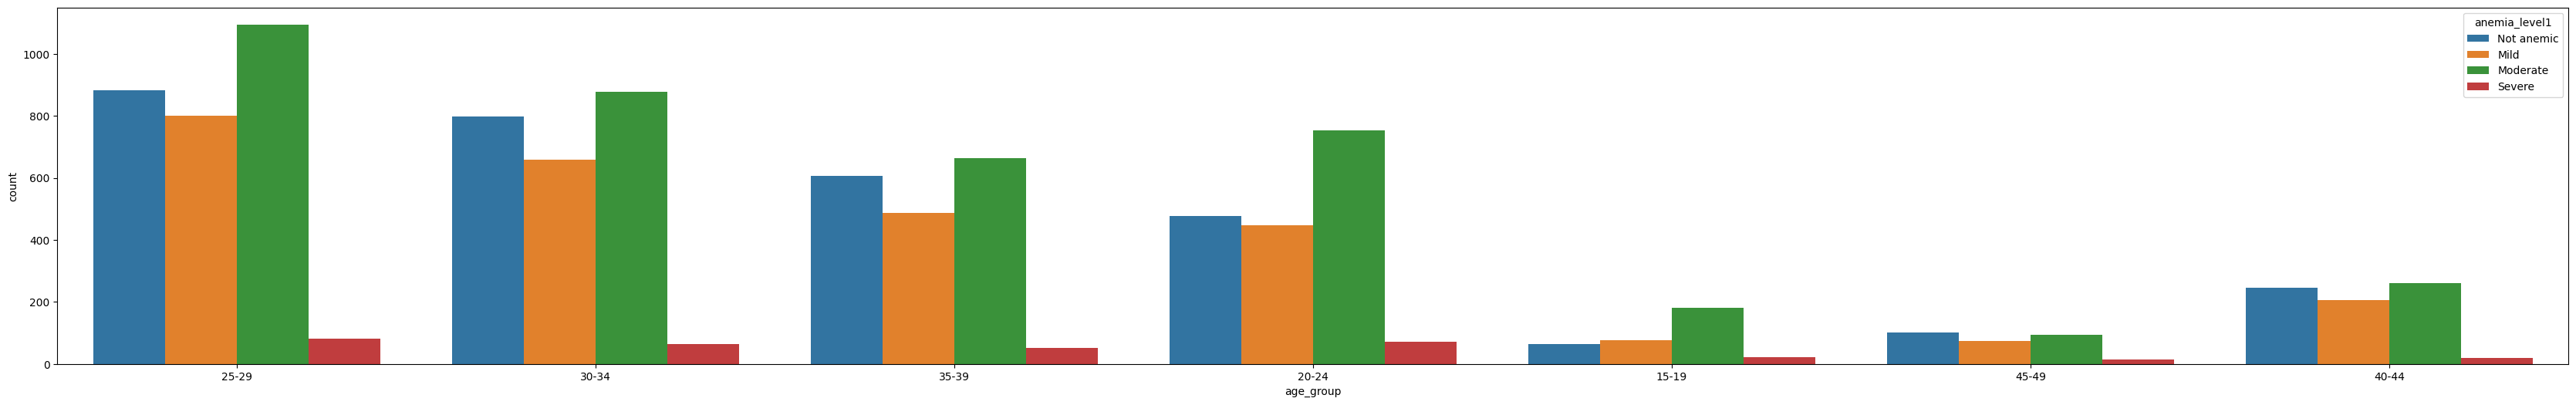

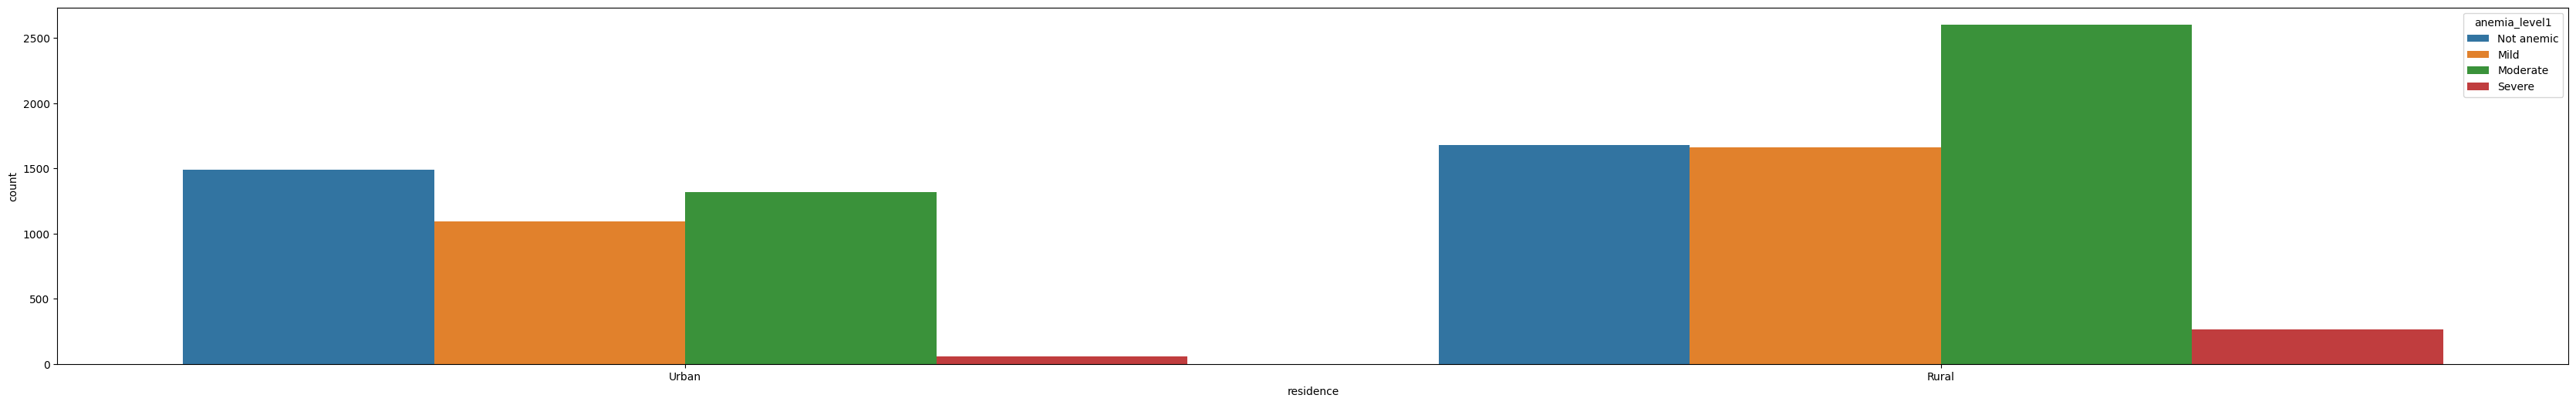

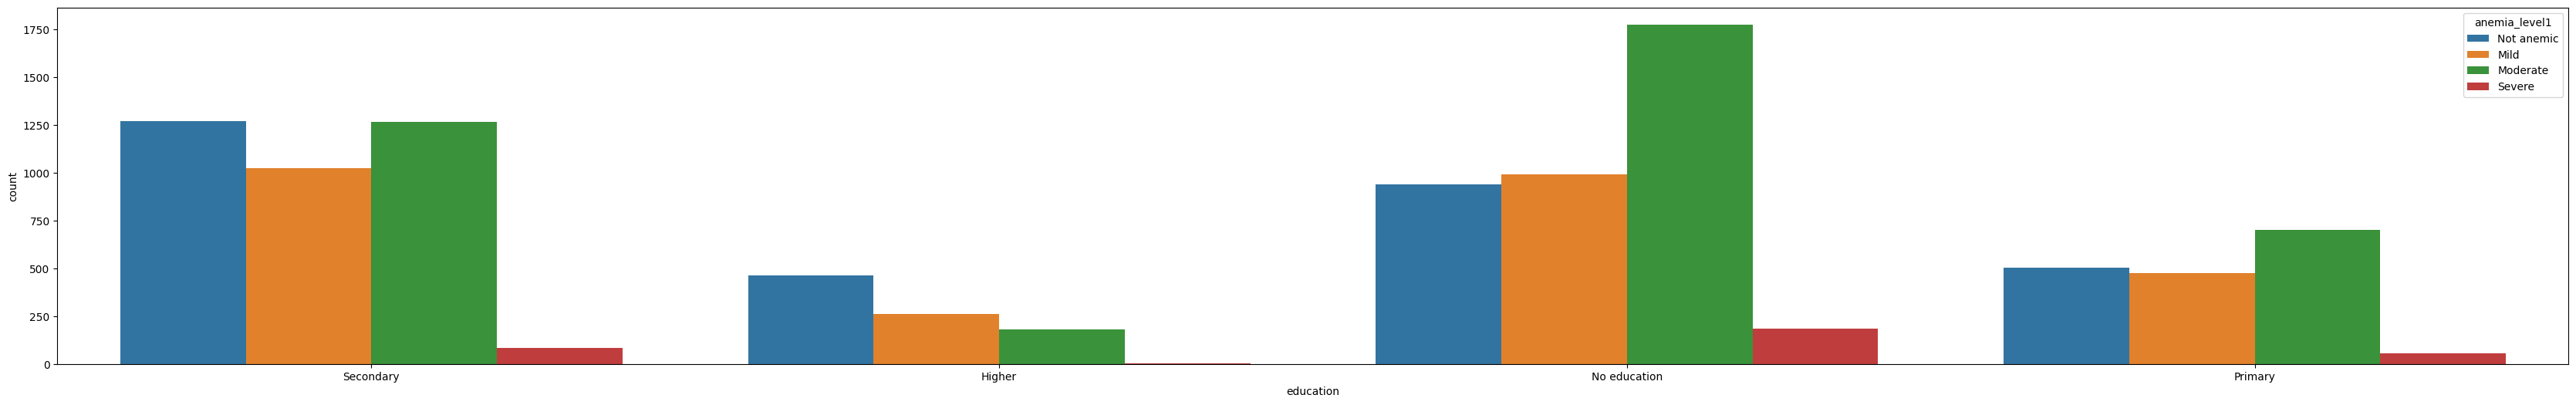

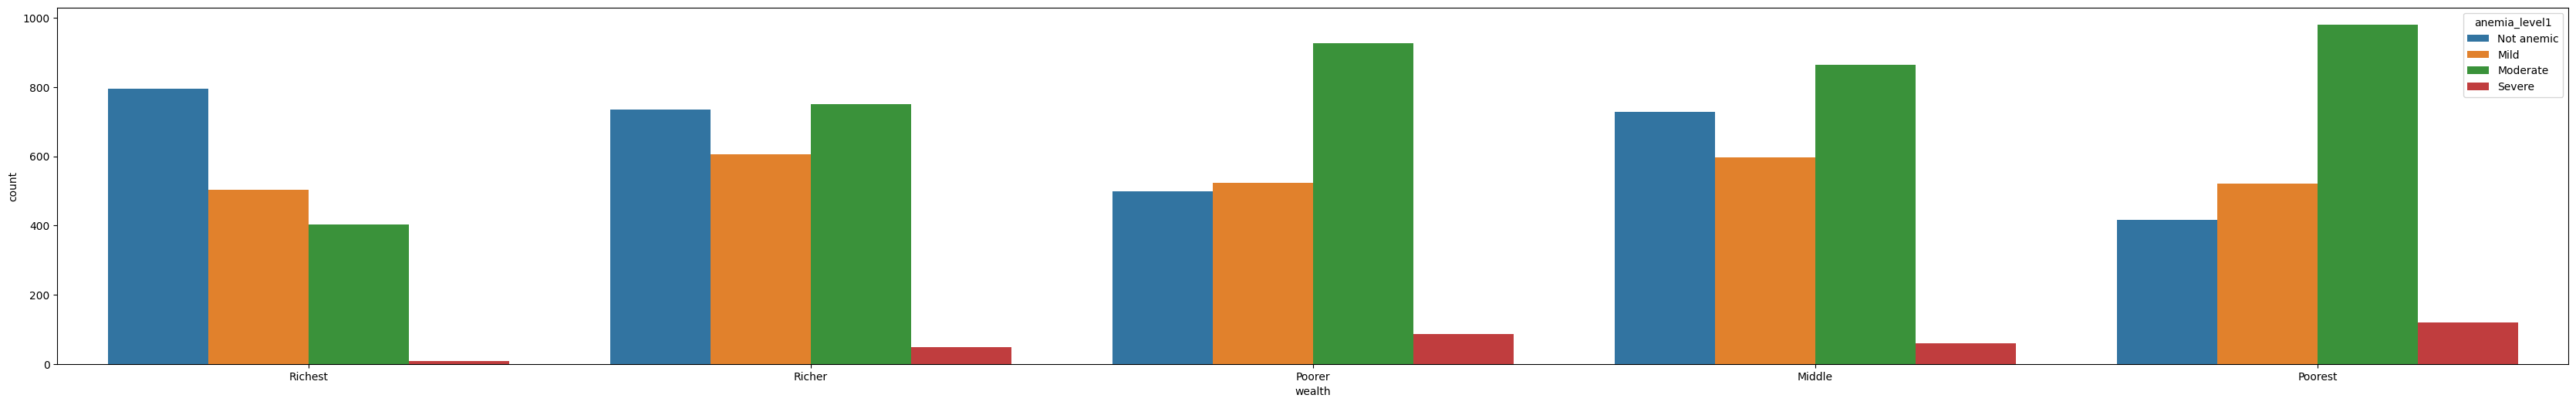

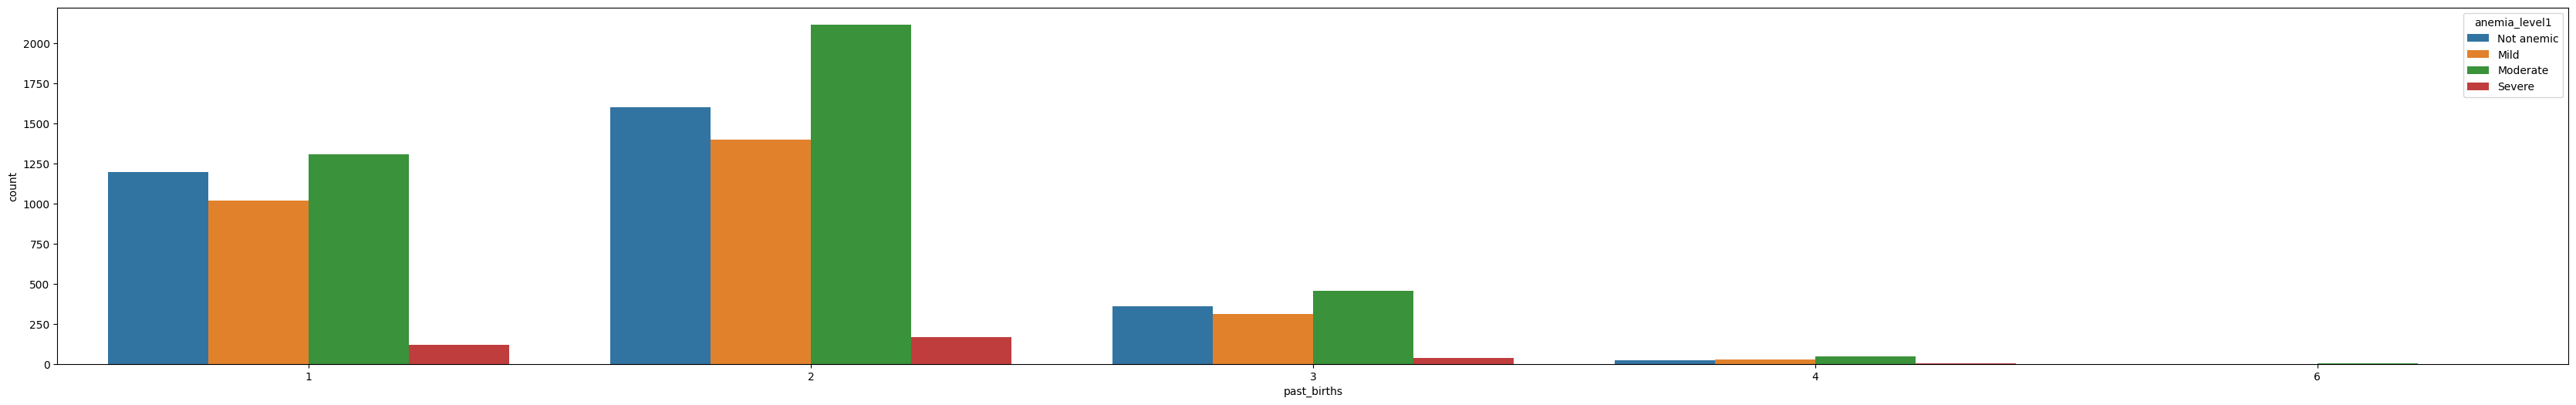

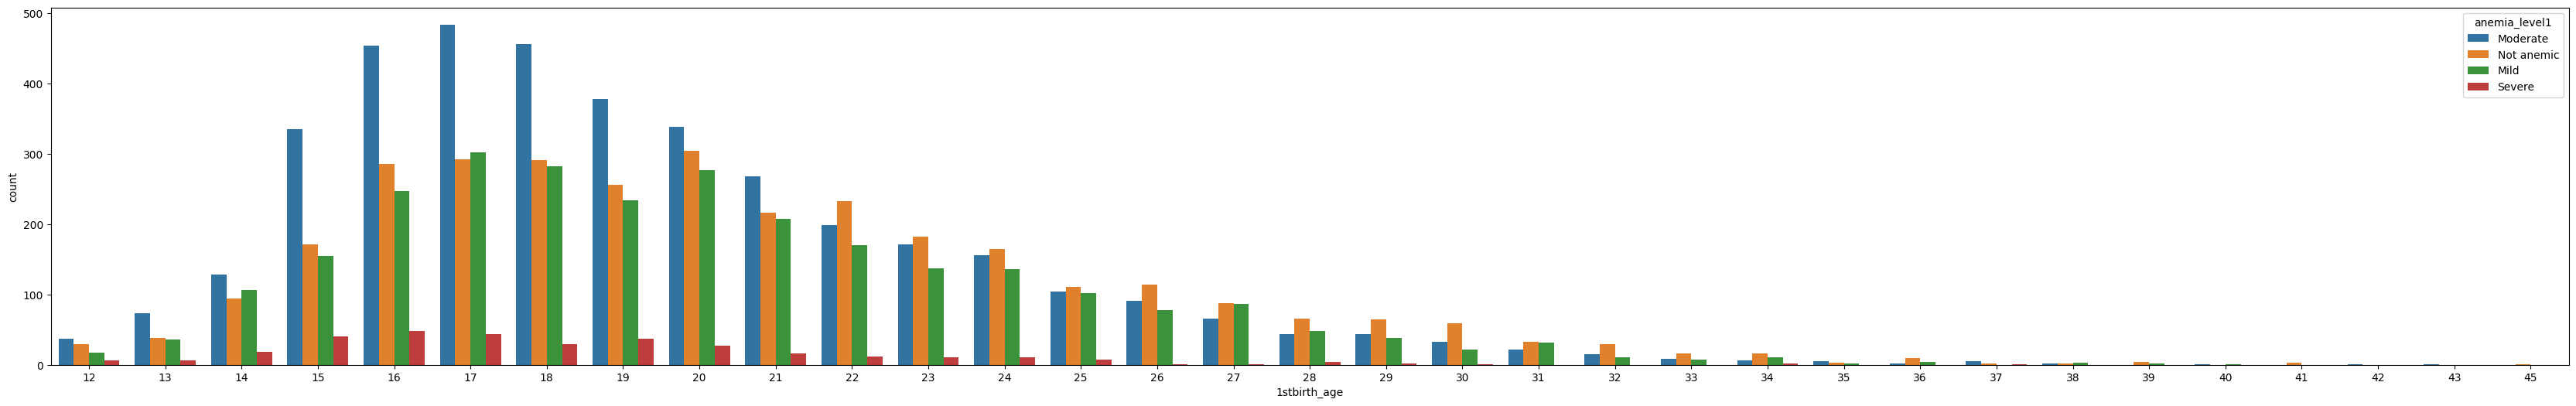

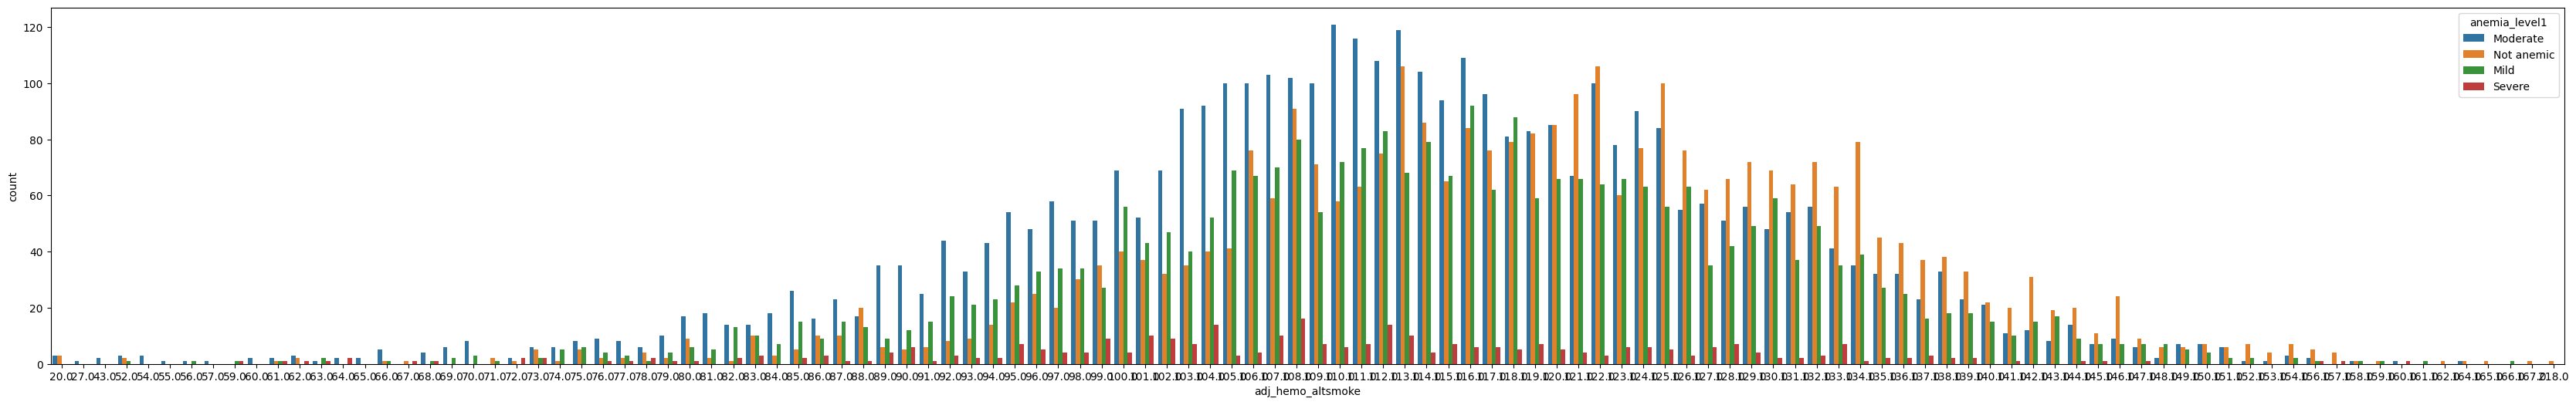

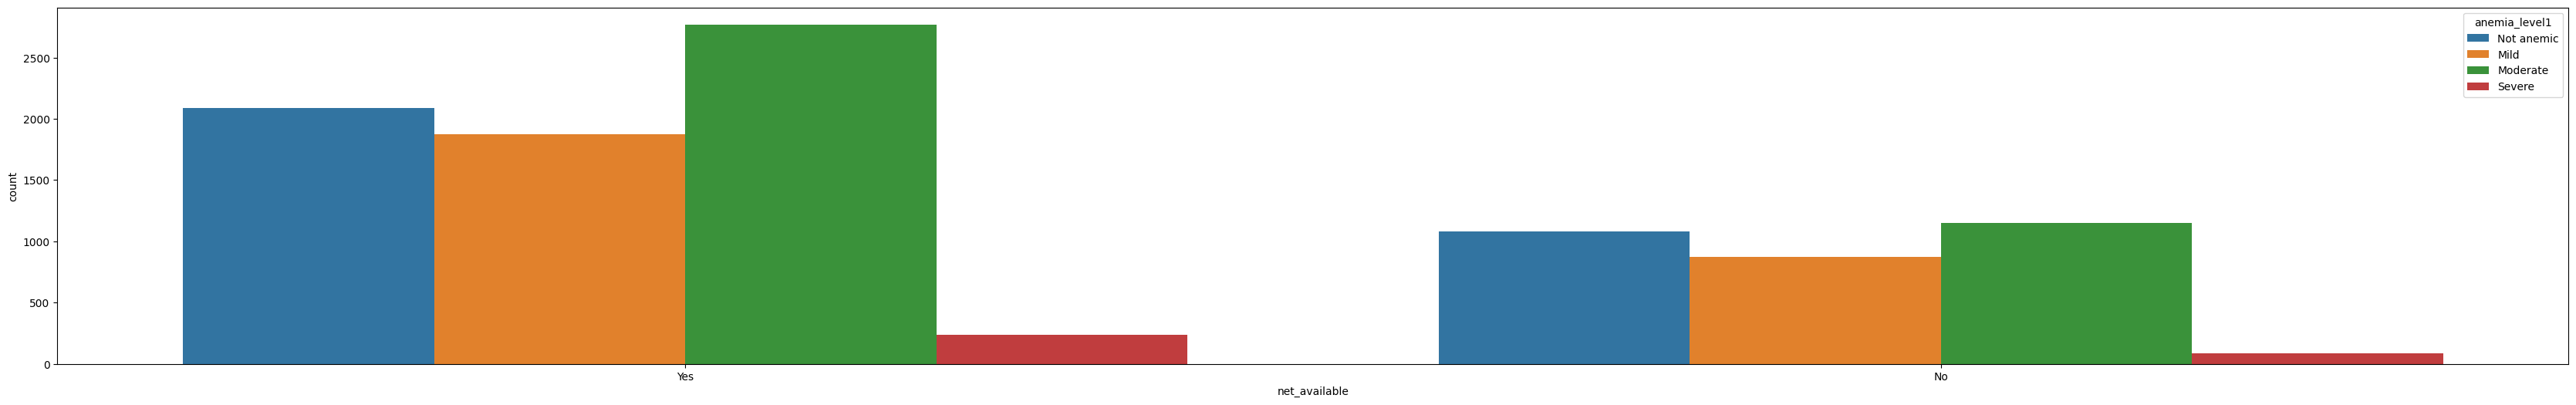

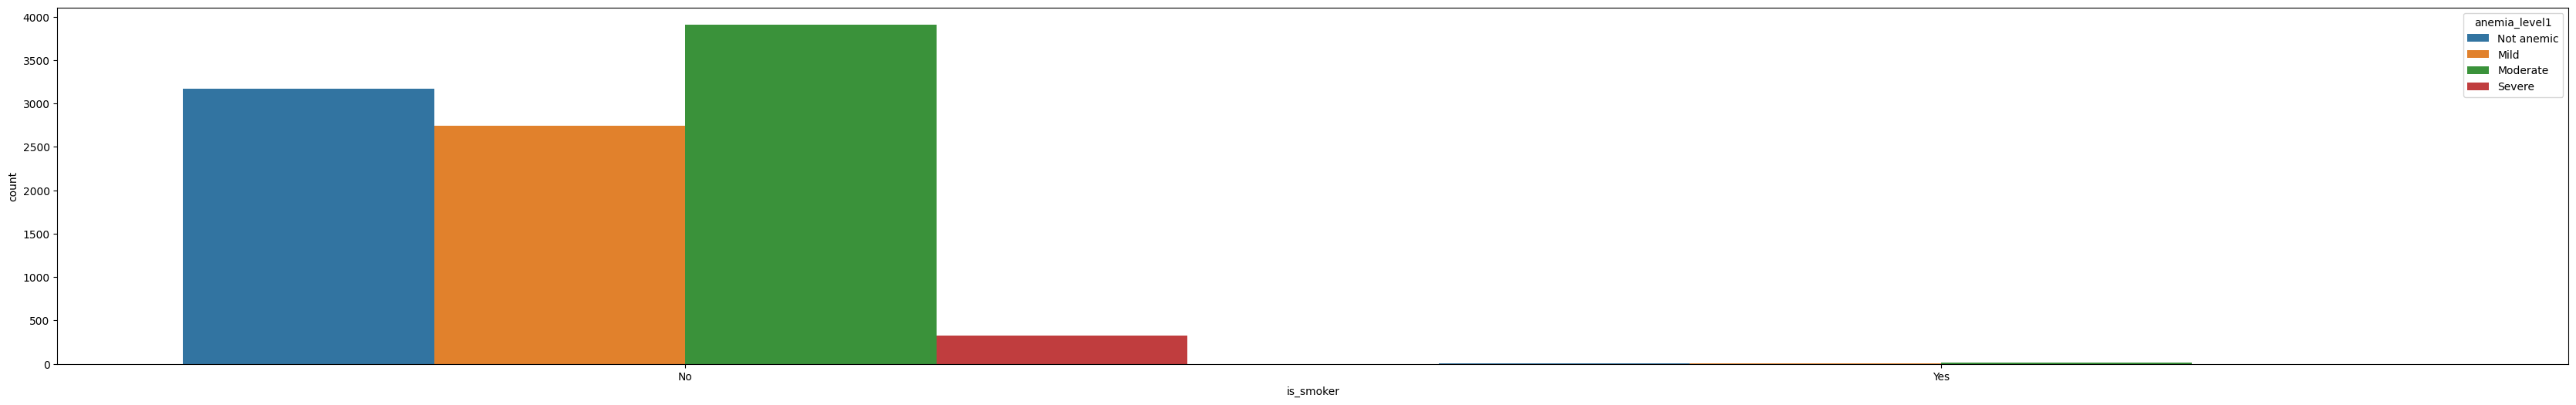

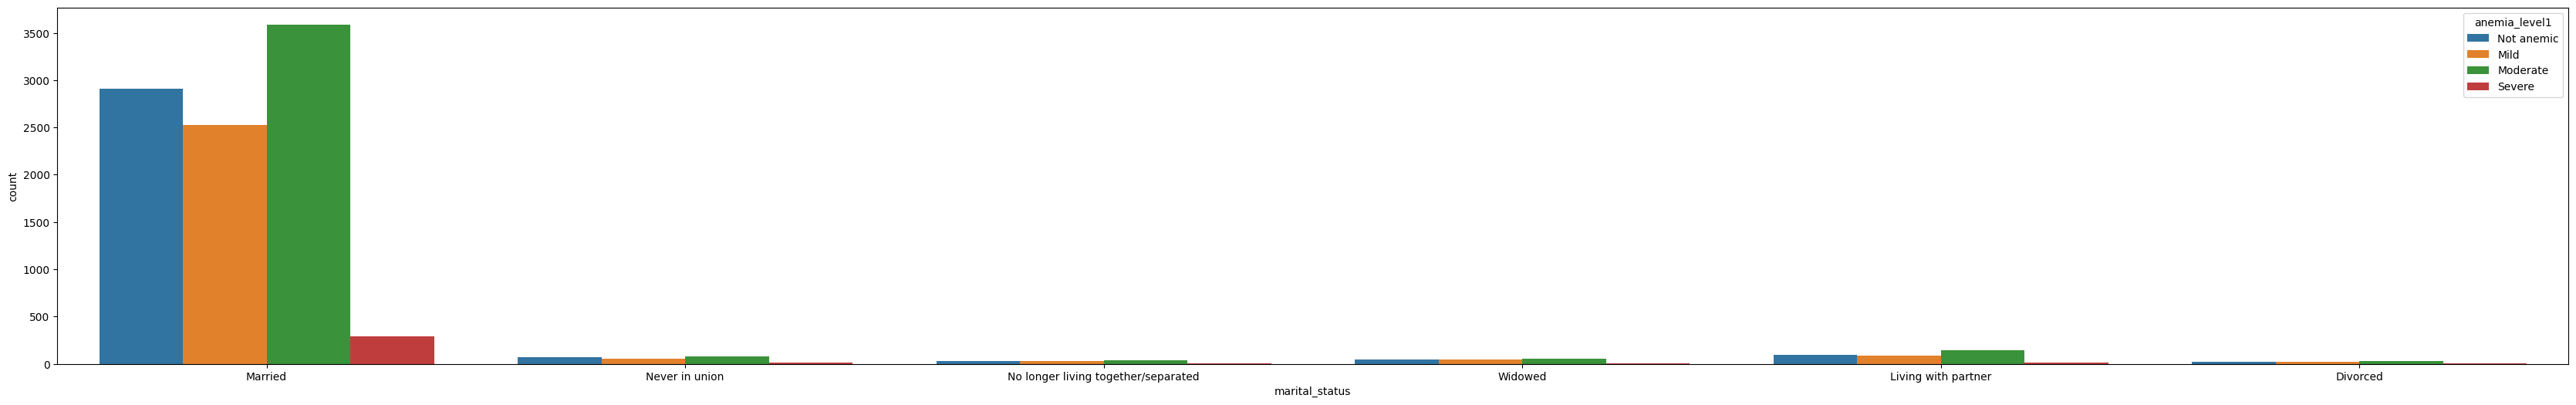

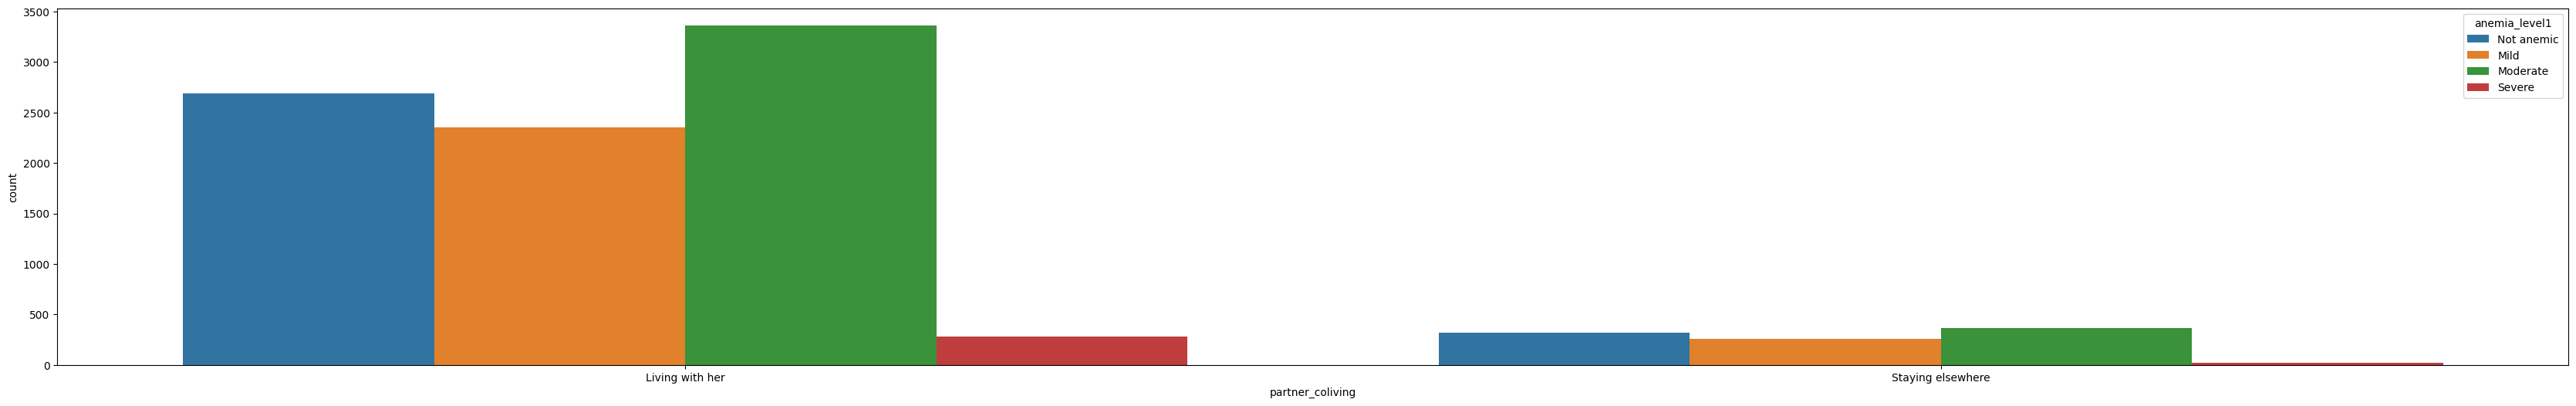

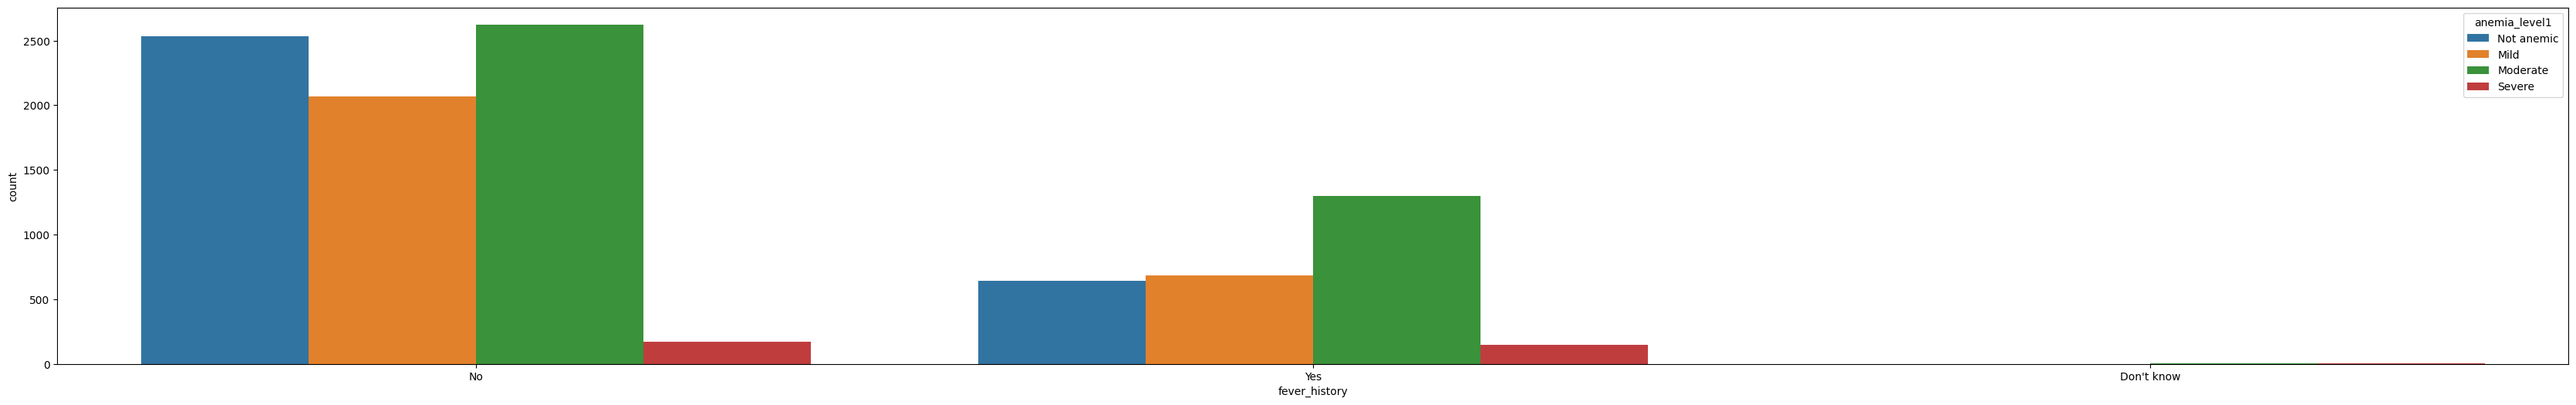

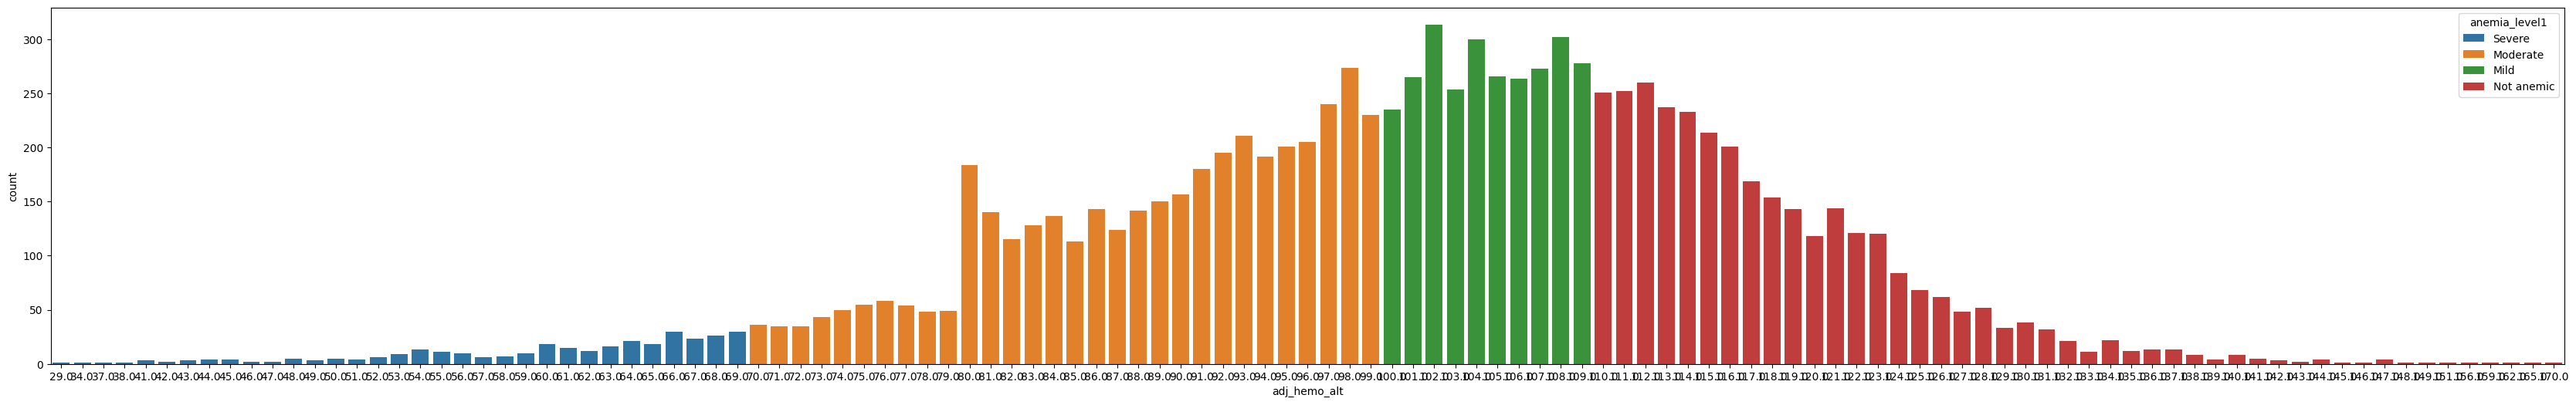

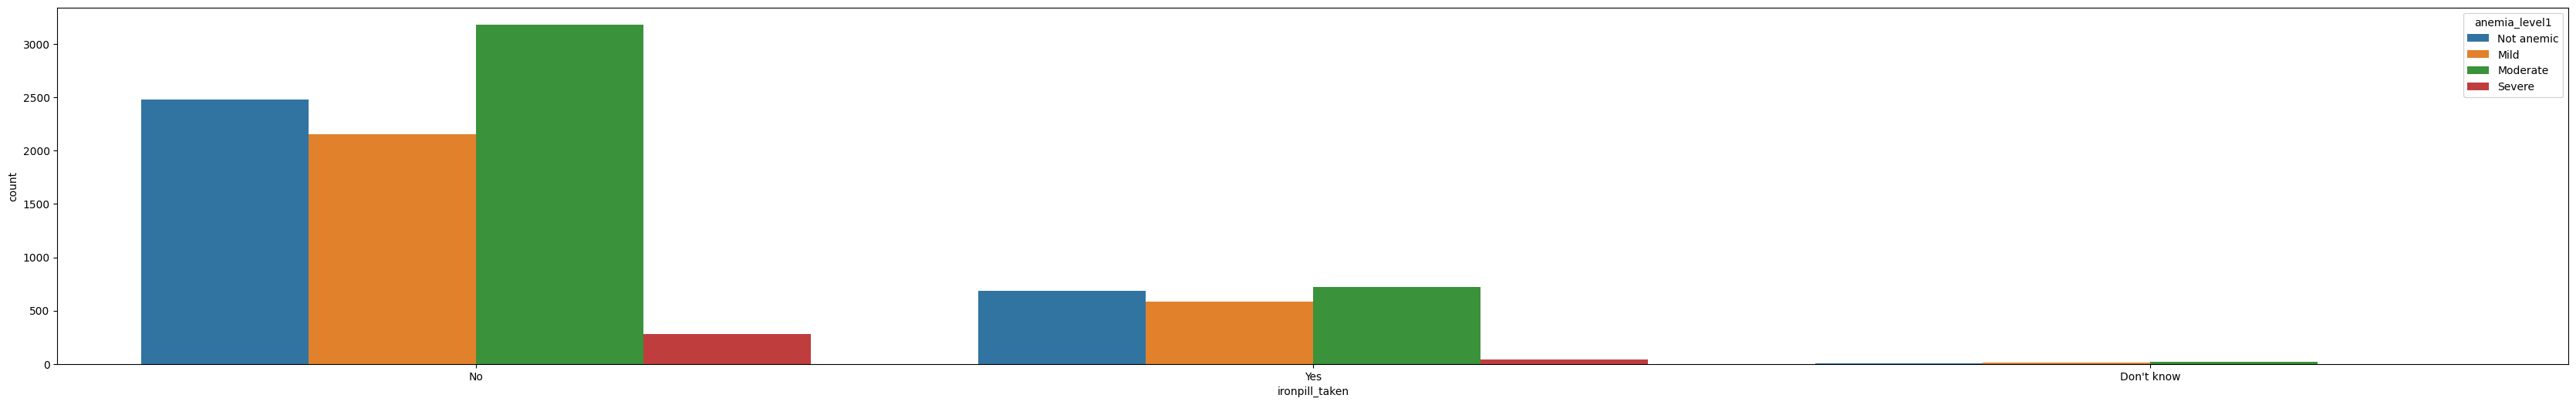

In [121]:
for col in df.columns:
    # NOTE breastfeeding data is still raw at this point, no point plotting them.
    if col in ["breastfed", "anemia_level", "anemia_level1"]:
        continue
    plt.figure(figsize=(42, 6))
    sns.countplot(df, x=col, hue='anemia_level1')
    plt.savefig(f"../img/multivar_countplot_{col}.png", dpi=300)
    plt.show()

### EDA VI: Multivariate Analysis : Boxplots

#### Boxplot for numerical columns

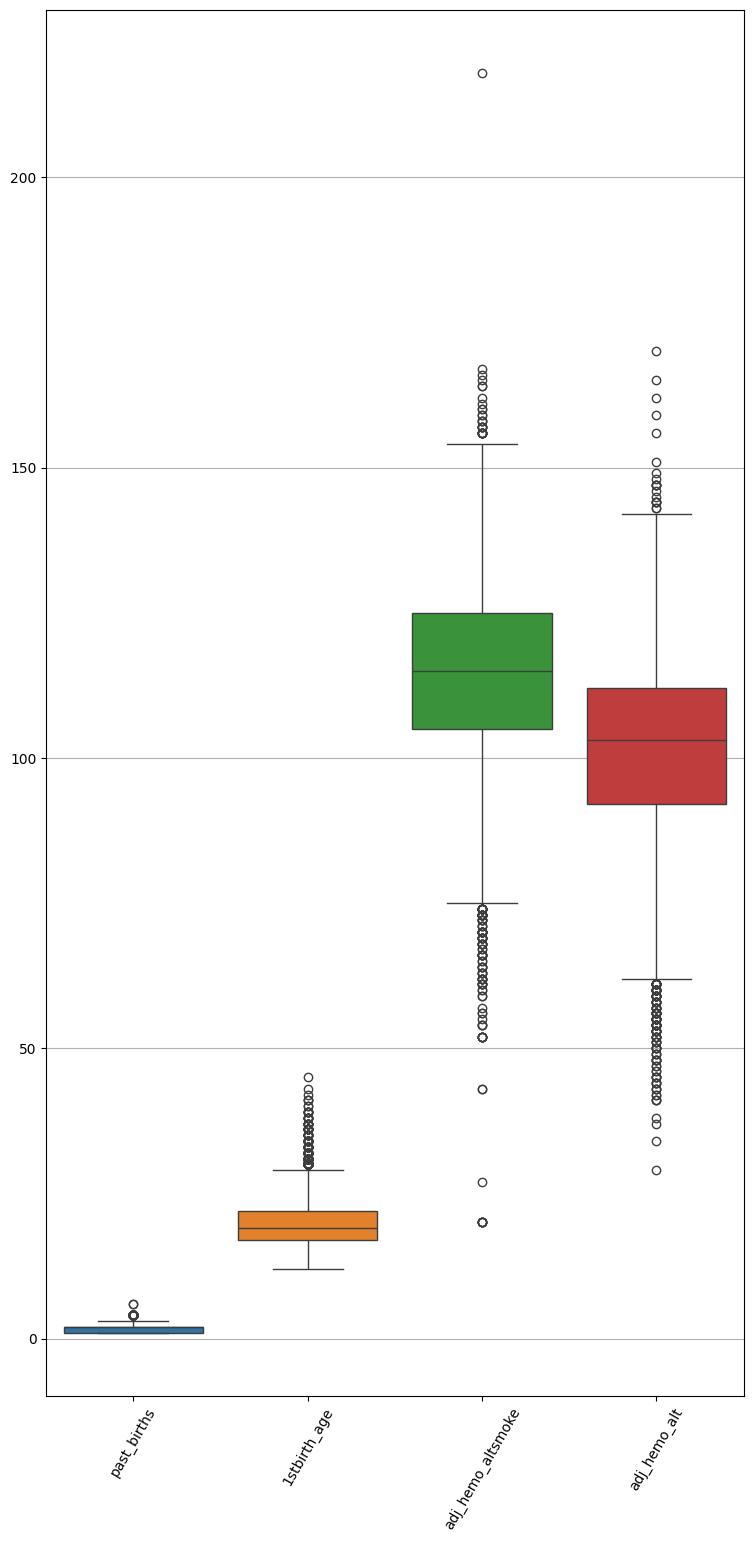

In [122]:
plt.figure(figsize=(9, 18))
plt.xticks(rotation=60)
plt.grid()
sns.boxplot(df)
plt.savefig("../img/multivar_boxplotnum.png", dpi=300)
plt.show()

### EDA VII: Hypothesis testing

#### Correlation of hemoglobin level with anemia



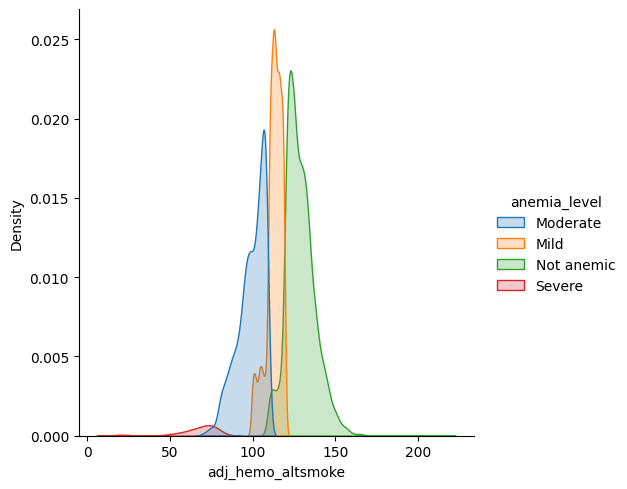

In [123]:
hemoaltsmkVanemia = sns.displot(df, x='adj_hemo_altsmoke', hue="anemia_level", kind="kde", fill=True)
hemoaltsmkVanemia.savefig("../img/hypo_hemoaltsmkVanemia.png", dpi=300)

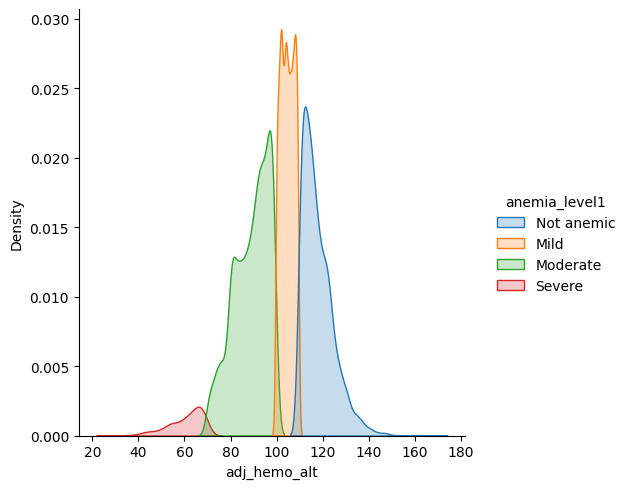

In [124]:
hemoaltVanemia = sns.displot(df, x='adj_hemo_alt', hue="anemia_level1", kind="kde", fill=True)
hemoaltVanemia.savefig("../img/hypo_hemoaltVanemia.png", dpi=300)

#### Correlation of residence type with anemia



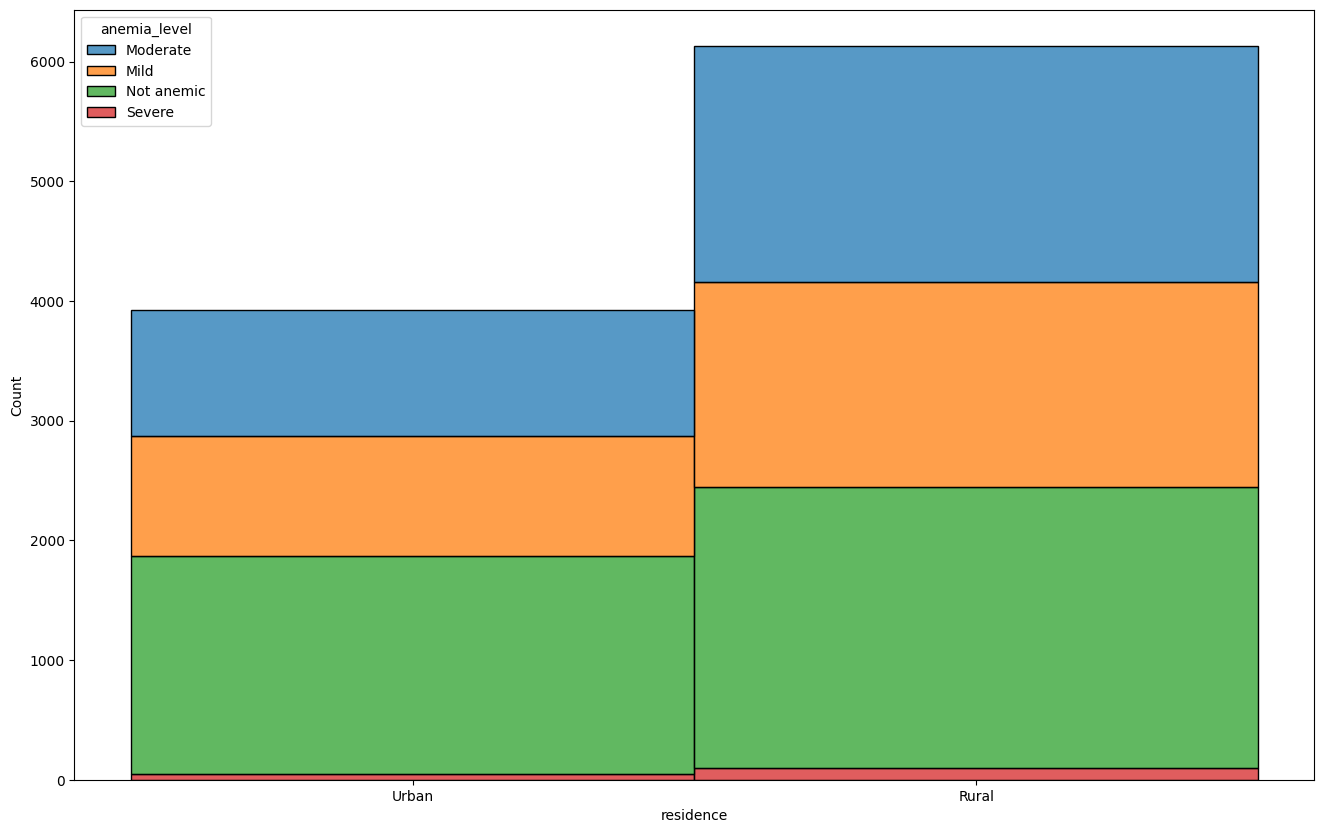

In [125]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='residence', hue='anemia_level', multiple='stack')
plt.savefig("../img/hypo_resiVanemic.png", dpi=300)
plt.show()

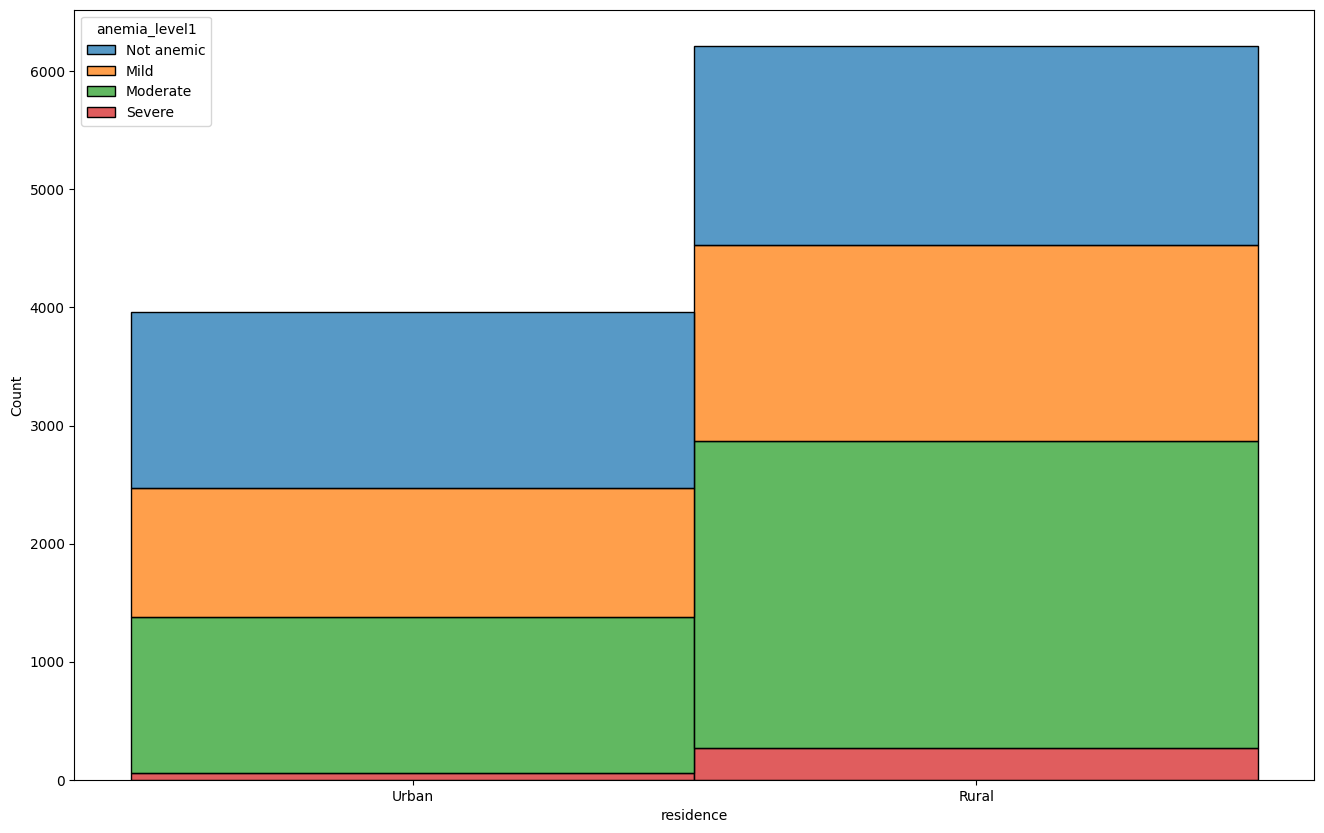

In [126]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='residence', hue='anemia_level1', multiple='stack')
plt.savefig("../img/hypo_resiVanemic1.png", dpi=300)
plt.show()

#### Correlation of education level with anemia



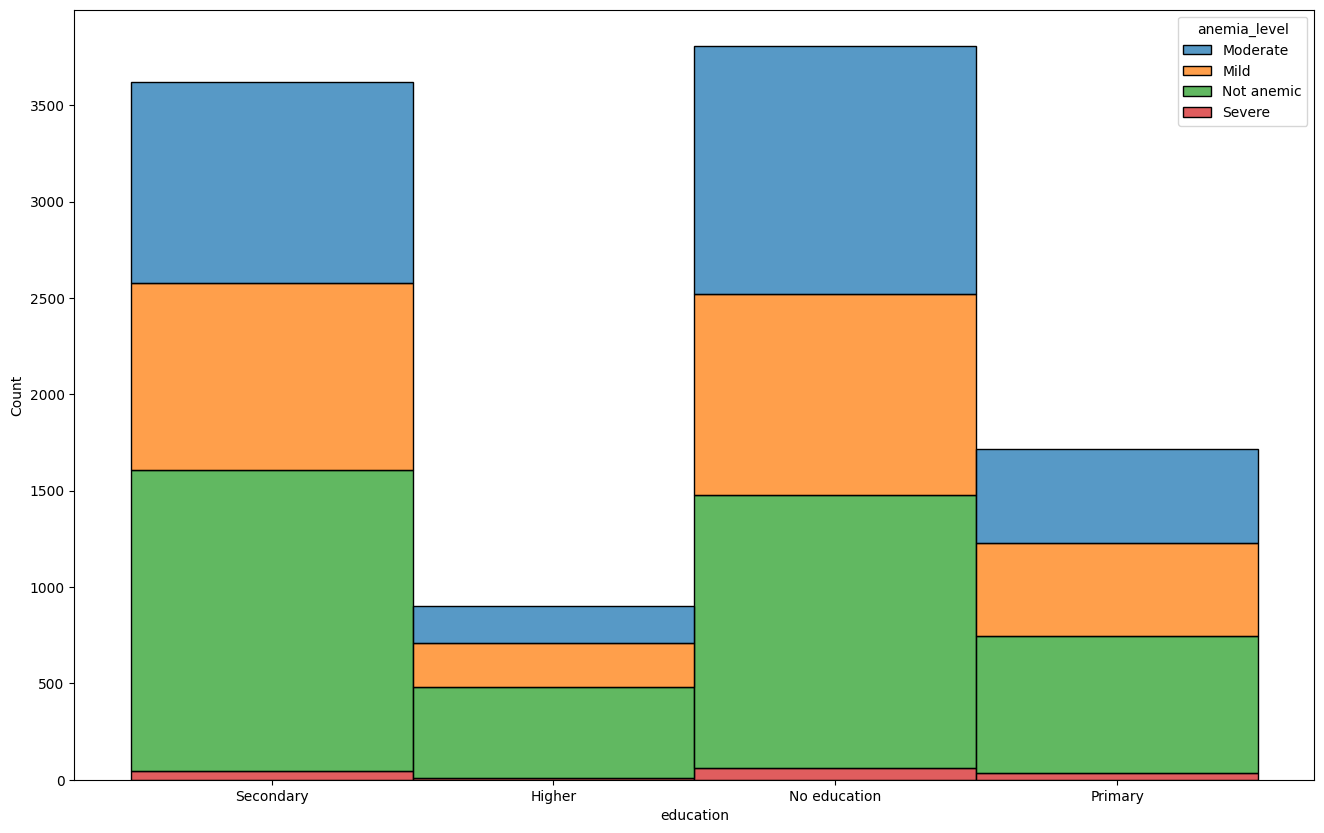

In [127]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='education', hue='anemia_level', multiple='stack')
plt.savefig("../img/hypo_eduVanemic.png", dpi=300)
plt.show()

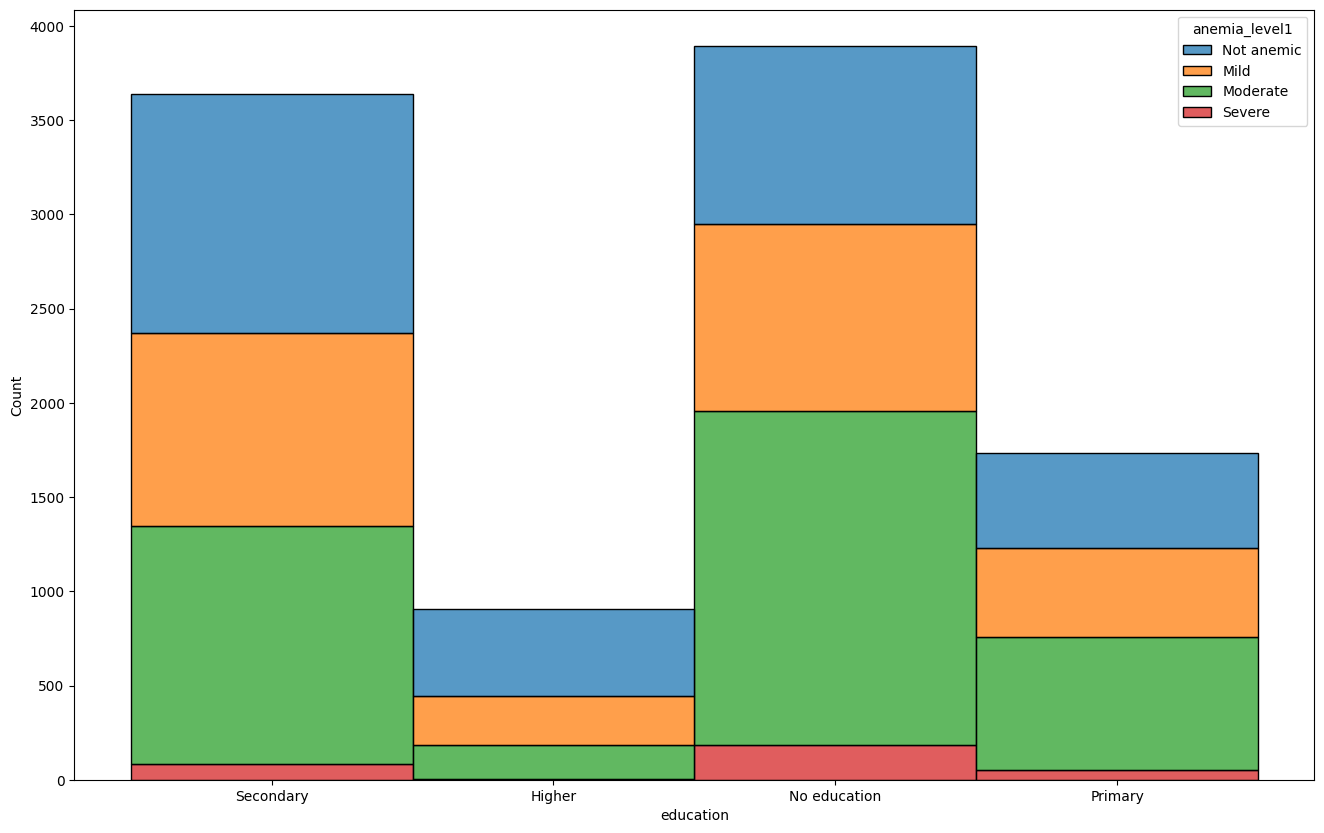

In [128]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='education', hue='anemia_level1', multiple='stack')
plt.savefig("../img/hypo_eduVanemic1.png", dpi=300)
plt.show()

#### Low correlation of mosquito bed net available with anemia


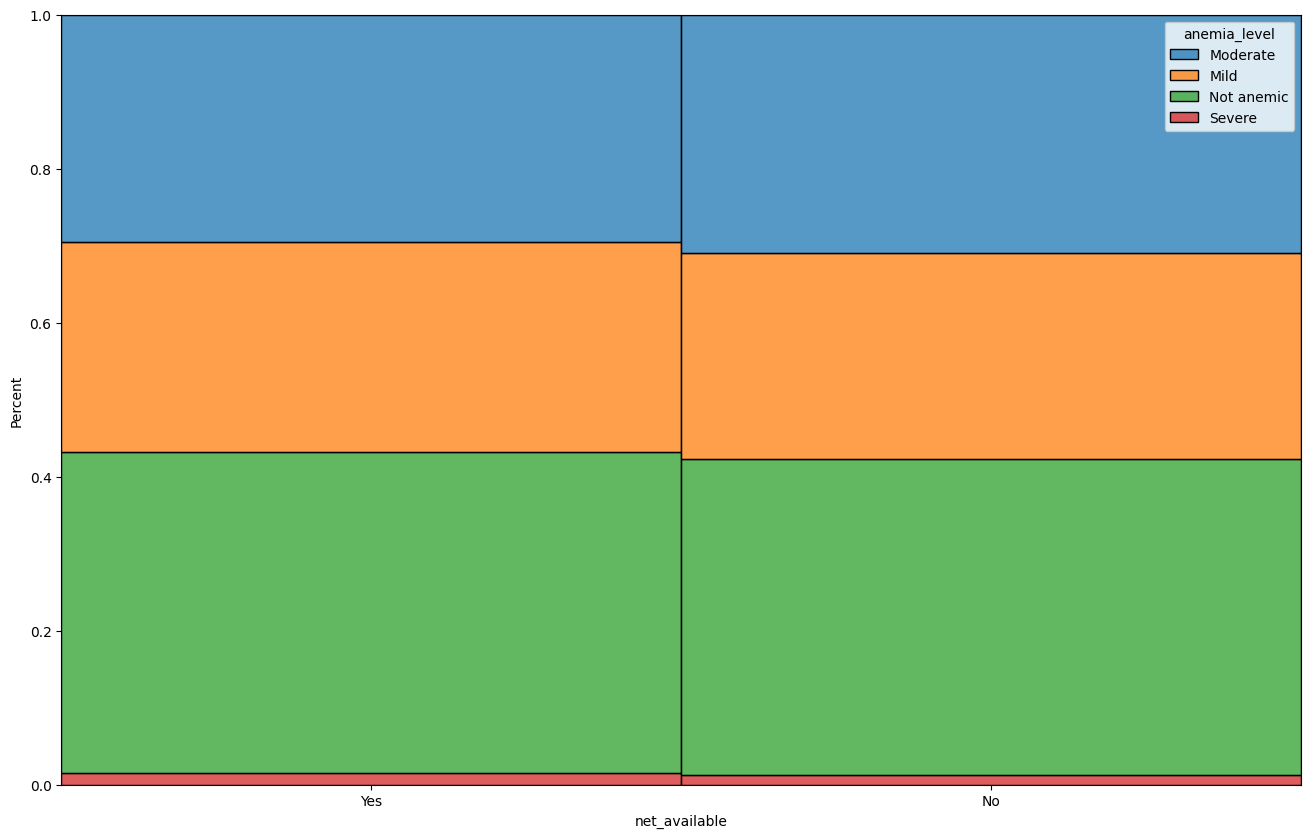

In [129]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='net_available', hue='anemia_level', multiple="fill", stat="percent")
plt.savefig("../img/hypo_netVanemic.png", dpi=300)
plt.show()

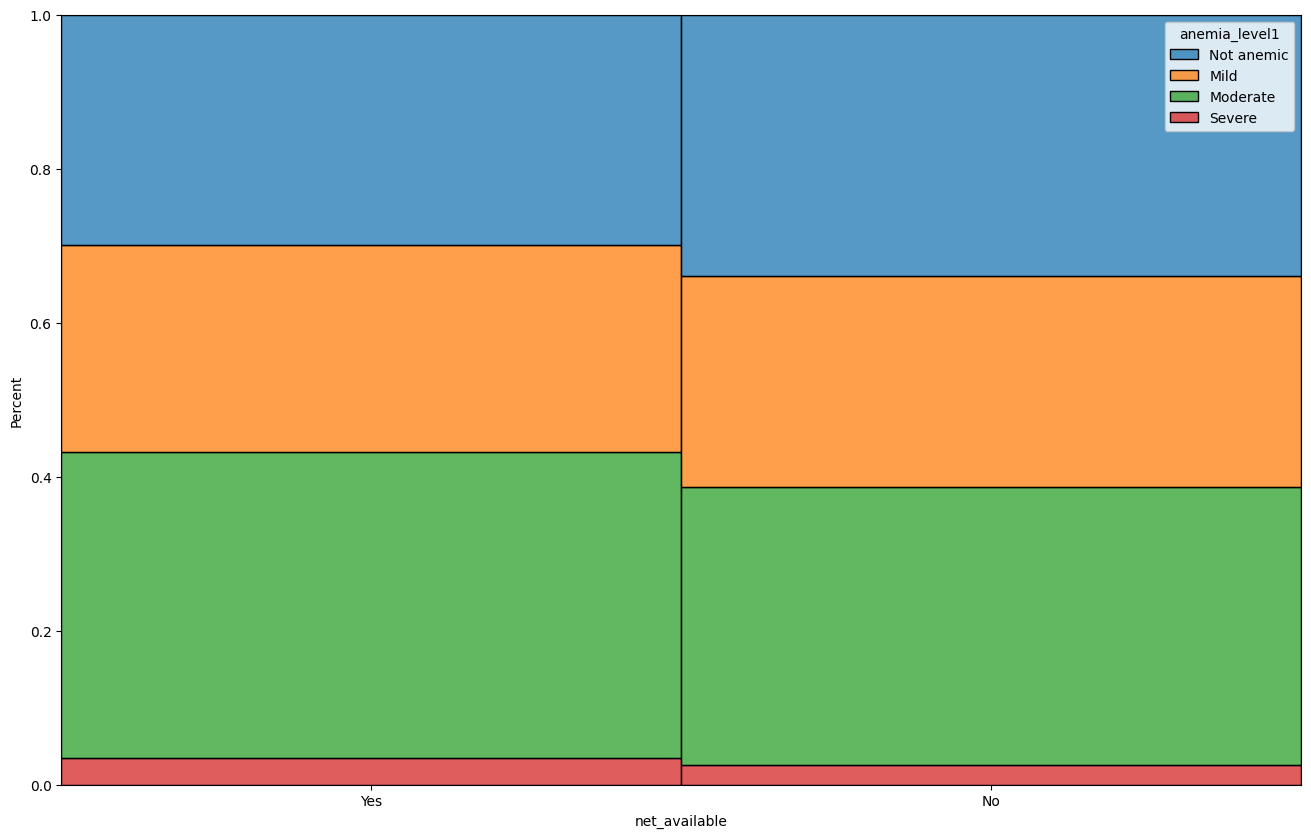

In [130]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='net_available', hue='anemia_level1', multiple="fill", stat="percent")
plt.savefig("../img/hypo_netVanemic1.png", dpi=300)
plt.show()

#### Correlation of cigarettes smoking with anemia



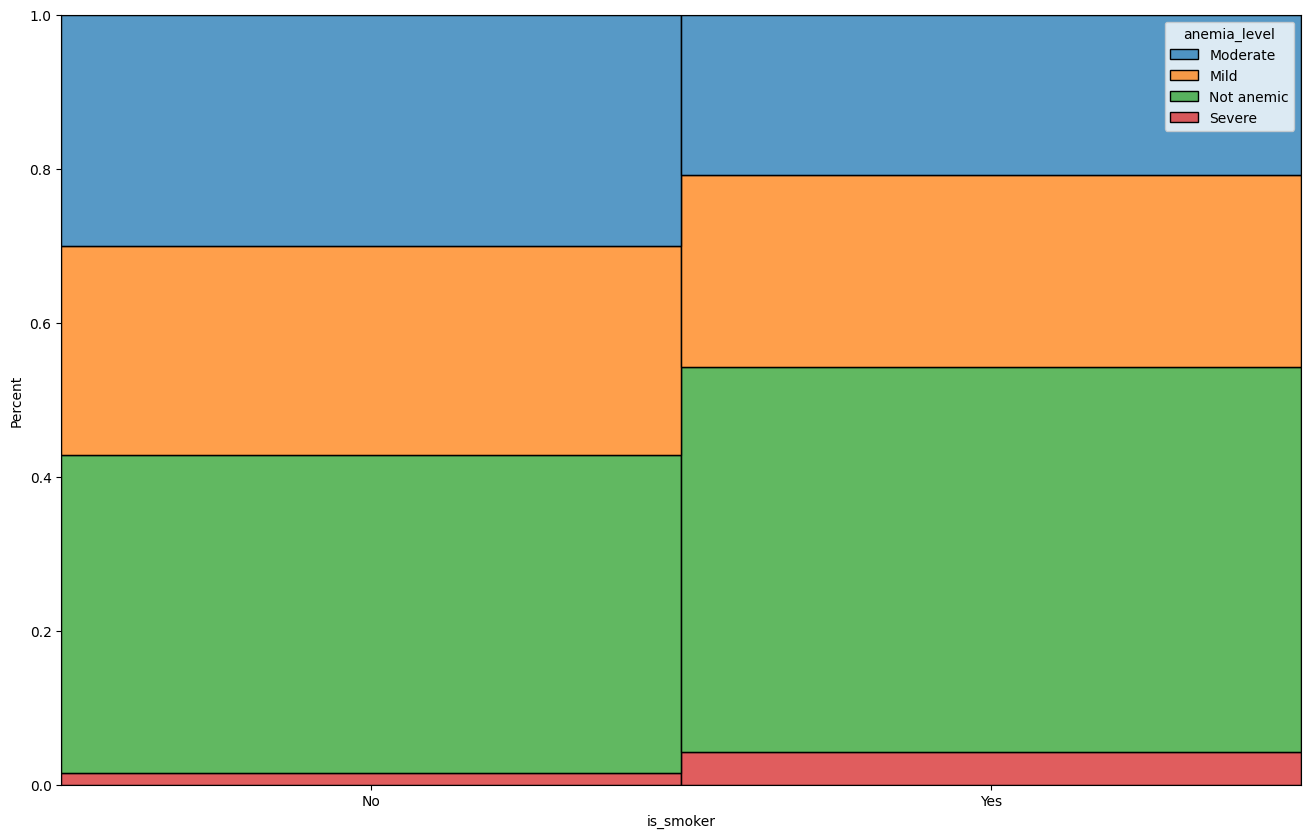

In [131]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='is_smoker', hue='anemia_level', multiple="fill", stat="percent")
plt.savefig("../img/hypo_smokeVanemic.png", dpi=300)
plt.show()

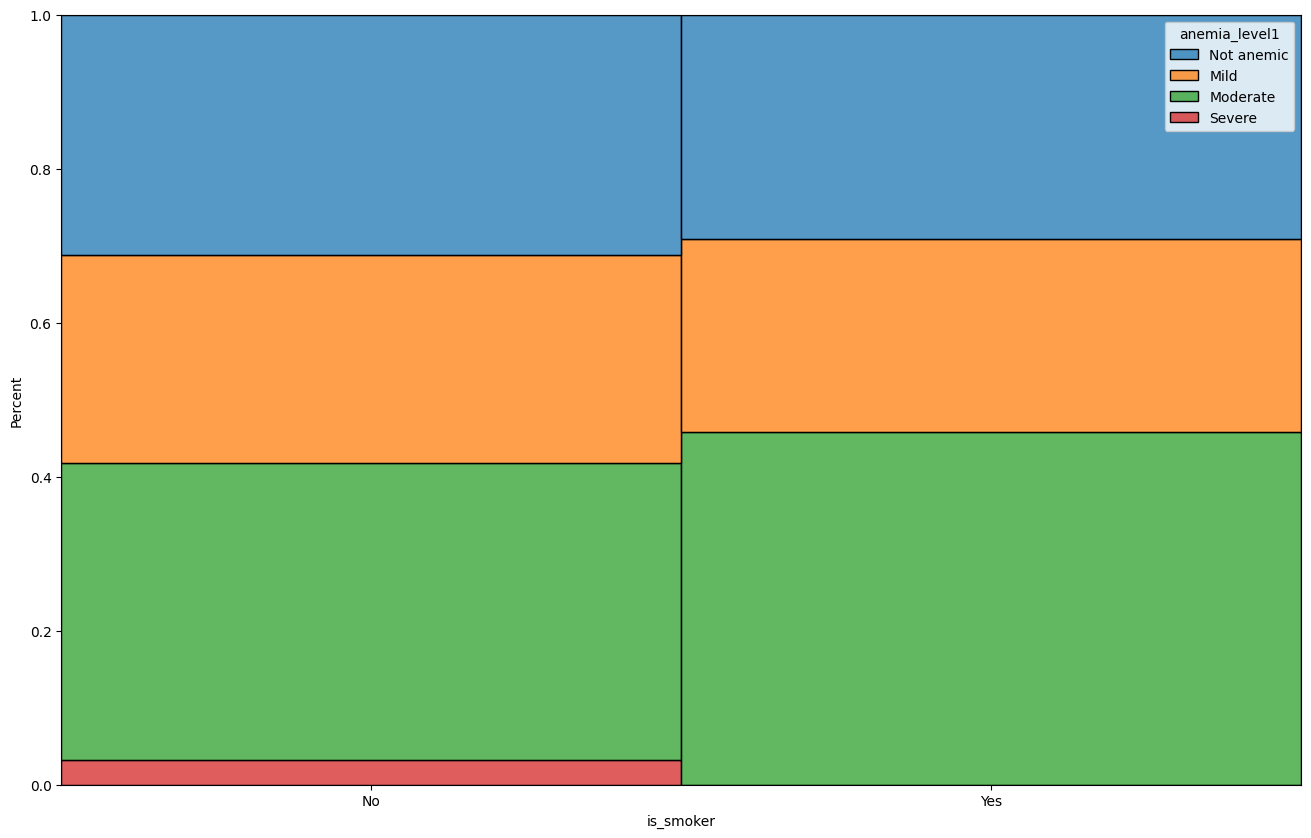

In [132]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='is_smoker', hue='anemia_level1', multiple="fill", stat="percent")
plt.savefig("../img/hypo_smokeVanemic1.png", dpi=300)
plt.show()

#### Little correlation of taking iron pills with anemia

No direct correlation can be found between iron pills taken with the anemic children. For the `anemia_level` feature, it seems it's unknown if pills are taken for most of the severely anemic children. And for the `anemia_level1` feature, severely anemic children are almost evenly distributed between those who take pills and who don't.

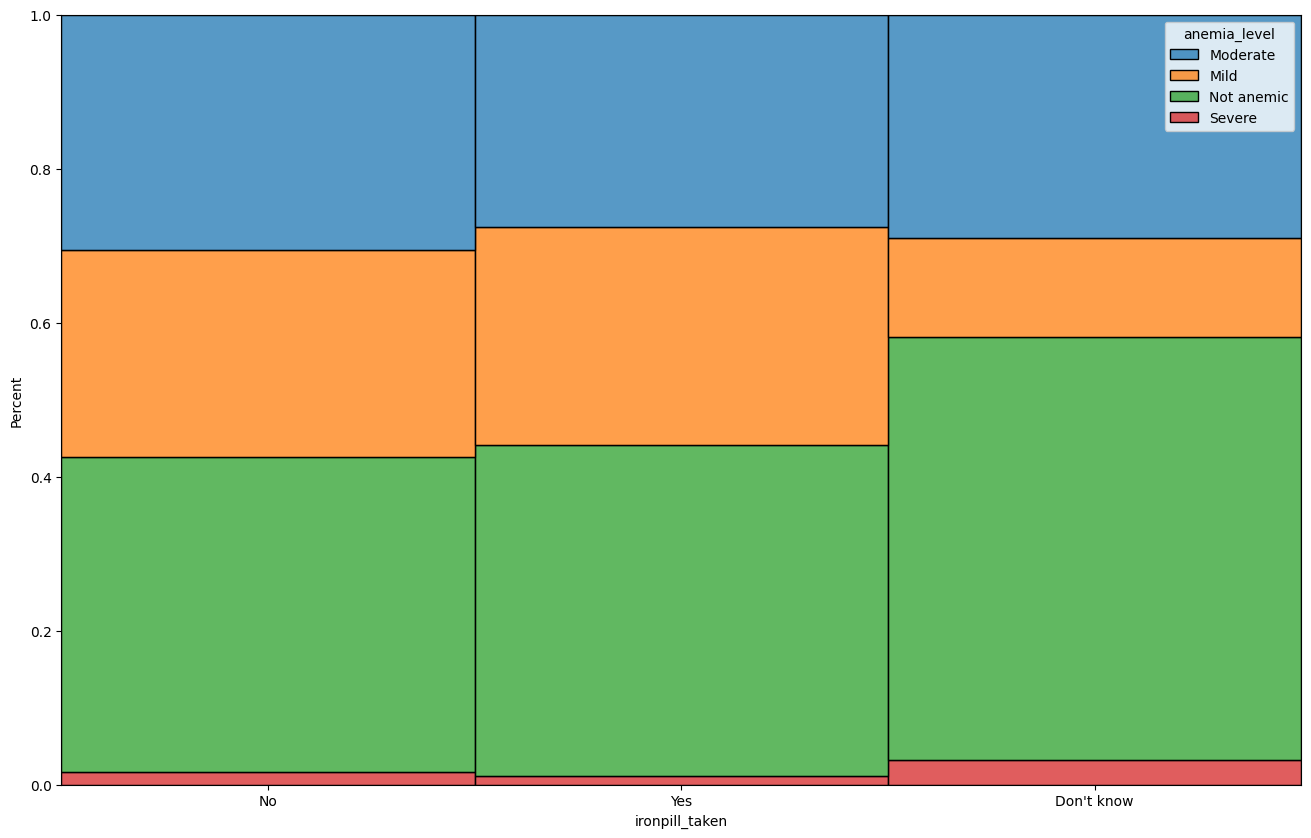

In [133]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='ironpill_taken', hue='anemia_level', multiple="fill", stat="percent")
plt.savefig("../img/hypo_pillsVanemic.png", dpi=300)
plt.show()

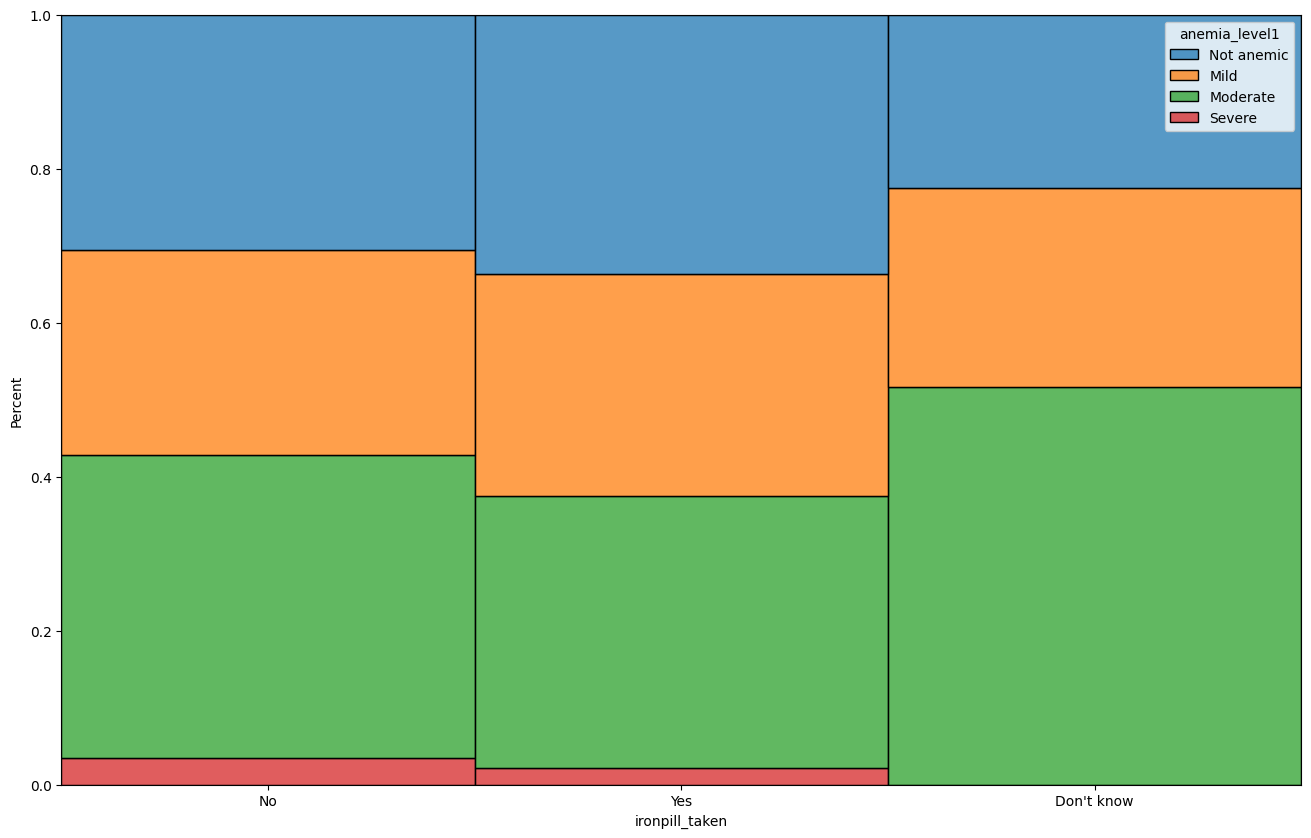

In [134]:
plt.figure(figsize=(16, 10))
resiVanemia = sns.histplot(df, x='ironpill_taken', hue='anemia_level1', multiple="fill", stat="percent")
plt.savefig("../img/hypo_pillsVanemic1.png", dpi=300)
plt.show()

### DATA CLEANING IV: Modify feature with domain specific data

#### Modify breastfeeding timing data

`df.breastfed` contains three types of data : 
 - sample : `nan` type : `<class 'float'>` # float type but null values
 - sample : `"100.0"` type : `<class 'str'>` # str type but floatable
 - sample : `"Days: 1"` type : `<class 'str'>` # str type but not floatable


In [135]:
# Fill up nan values and modify other not-float not-null str values to floatable values

breastfed_times = set()
legit_fvals = []
for data in df.breastfed:
    if not isinstance(data, str):
        pass
    else:
        try:
            float(data)
        except ValueError as ve2:
            pass
        else:
            legit_fvals.append(float(data))
    try:
        float(data)
    except ValueError as ve:
        try:
            int(data)
        except ValueError as ve:
            breastfed_times.add(data)
print(*breastfed_times, sep="\n")

Days: 1
Hours: 1
Immediately


In [136]:
print("First five vals : ", *legit_fvals[:5], sep="\n")
print(f"maximum : {max(legit_fvals)}")
print(f"minimum : {min(legit_fvals)}")

First five vals : 
105.0
103.0
203.0
102.0
111.0
maximum : 223.0
minimum : 102.0


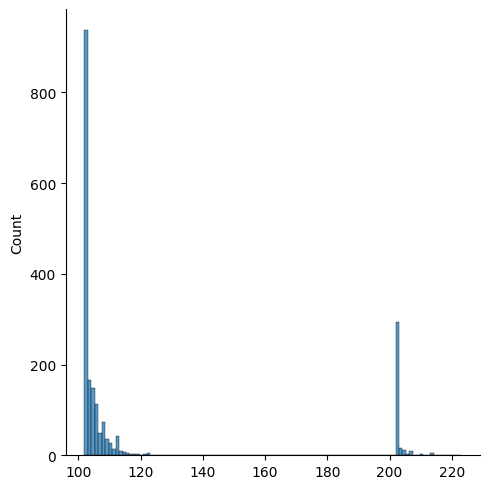

In [137]:
# Check the distribution of legit float values of breastfeeding data
breastfed_rawplot = sns.displot(legit_fvals)
breastfed_rawplot.savefig("../img/univar_breastfed_rawplot.png")

In [138]:
# Count of elaborate string values
df.breastfed.apply(lambda i : i in breastfed_times).sum()

4378

#### Domain knowledge ::

m34 = "When child put to breast"

Time after the birth at which the respondent first breastfed the child. The first digit gives the units in which the respondent gave her answer. Code 0 means the child was breastfed immediately after birth, code 1 indicates the response was in hours, code 2 in days, with code 9 meaning a special answer was given. The last two digits give the time in the units given.

Any value for time greater than 90 is a special answer. The response "Immediately" is recorded as 000.

In [139]:
import re
# Variables to check consistency of data
# Last char is always zero.
lastchar = set()
# Length is always 5
len_words = set()

def breastfed_modifier(data:str):
    """
    """
    # print(data, type(data))
    data_mod = np.nan
    isFloat = False
    isWords = False
    if isinstance(data, str):
        try:
            float(data)
        except ValueError:
            pass
        else:
            isFloat = True
    try:
        float(data)
    except ValueError as ve:
        try:
            int(data)
        except ValueError as ve:
            isWords = True

    if isFloat:
        lastchar.add(data[-1])
        len_words.add(len(data))
        # True float data is of format 'xxx.0'
        indicator, count = data[0], data[1:-2]
        indicator, count = int(indicator), int(count)
        if indicator == 1:
            data_mod = count
        elif indicator == 2:
            data_mod = 24 * indicator + count
    if isWords:
        if 'immediately' in data.lower():
            data_mod = 0
        elif 'hours' in data.lower():
            hours = re.findall('\d+', data)
            if hours:
                data_mod = int(hours[0])
        elif 'days' in data.lower():
            days = re.findall('\d+', data)
            if days:
                data_mod = int(days[0]) * 24
    if isinstance(data_mod, str):
        print(data, type(data), data_mod, type(data_mod))
    return data_mod


#### Modify breastfeeding data

In [140]:
df.breastfed = df.breastfed.apply(breastfed_modifier)


#### Verify the consistency of data

The breastfeeding data is found to be consistent with the format. It always has five chars in it, always ends up with `".0"` and always starts with either hours or days indicator which is either `1` or `2`. So the generic format is `1xx.0` or `2xx.0`. We modified this generic format into integers previously.

In [141]:
print(lastchar)
print(len_words)

{'0'}
{5}


### EDA VIII: Univariate analysis for modified breastfeeding data

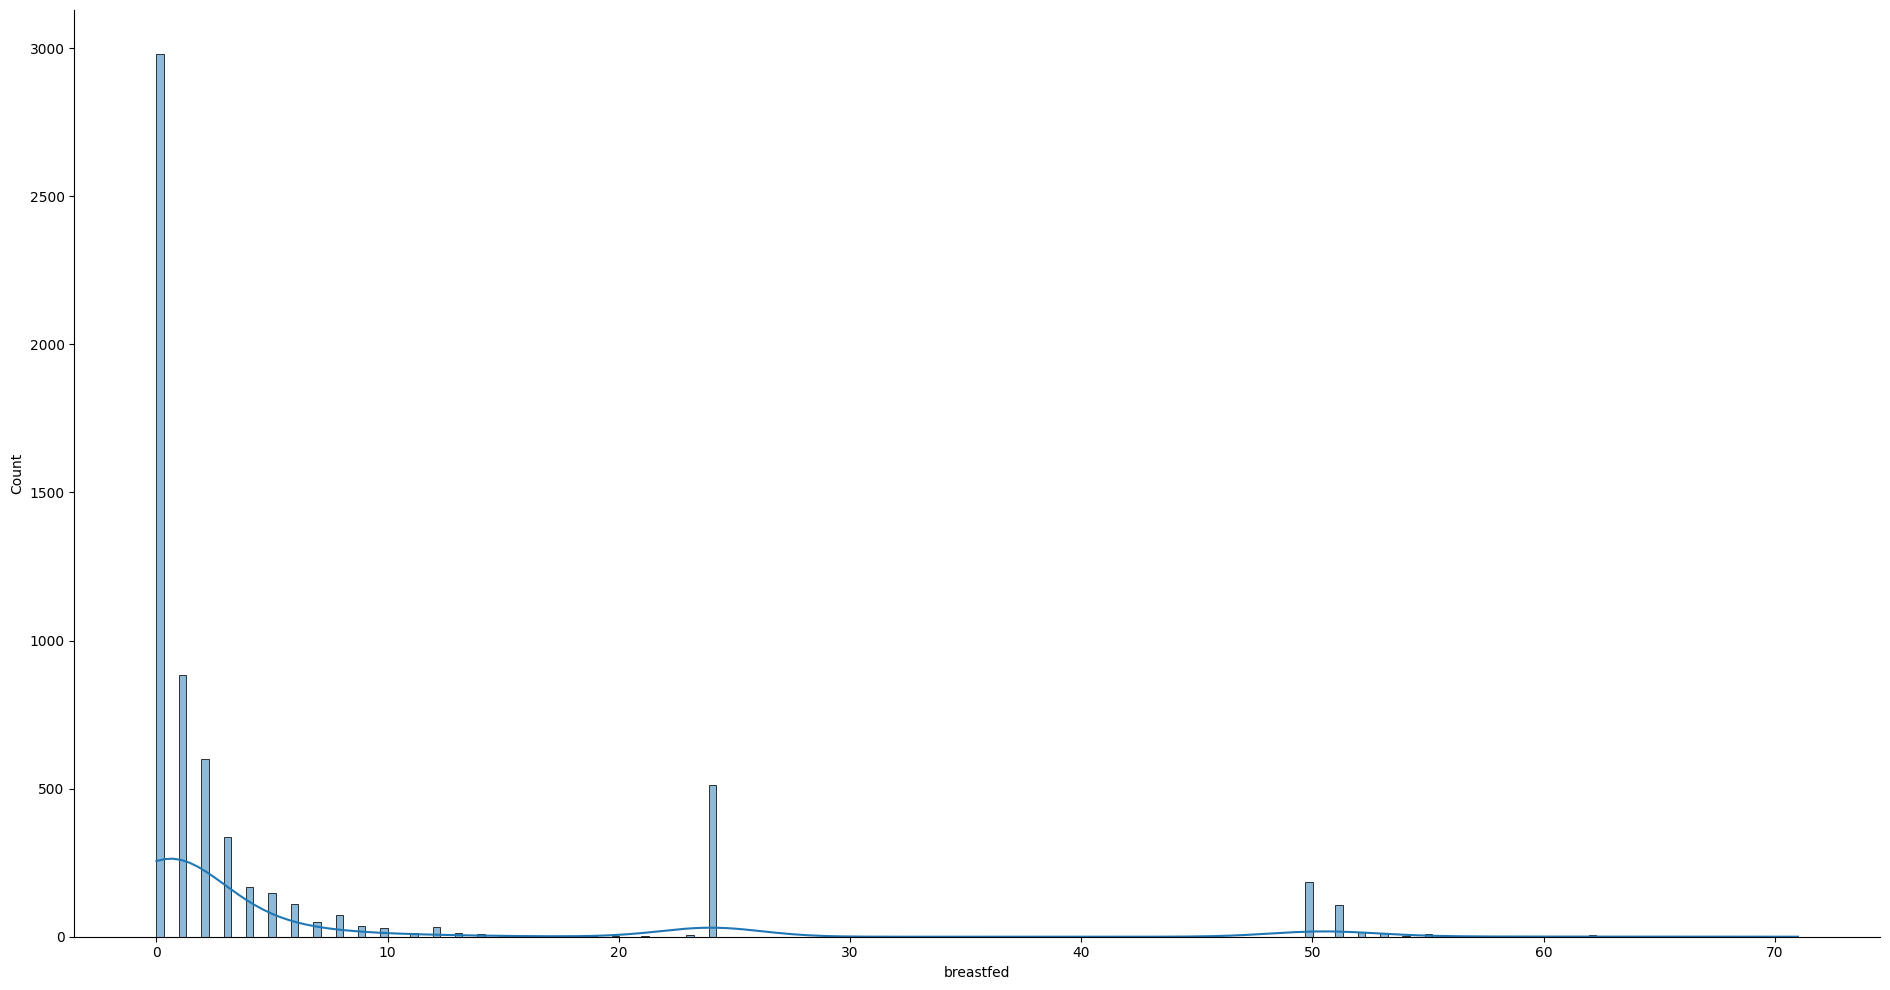

In [142]:
uni_breastfed_plot = sns.displot(df['breastfed'], kde=True, height=10, aspect=1.9)
uni_breastfed_plot.savefig("../img/univar_breastfed.png", dpi=300)

### DATA CLEANING V: Fill up missing breastfeed data with mean values

In [143]:
df.breastfed.fillna(df.breastfed.mean(), inplace=True)

/var/folders/6x/m1j3yfvd2w1cm6zs4szyh4r00000gn/T/ipykernel_7601/257440025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.breastfed.fillna(df.breastfed.mean(), inplace=True)


### EDA IX: Univariate analysis for modified and missing filled breastfeeding data

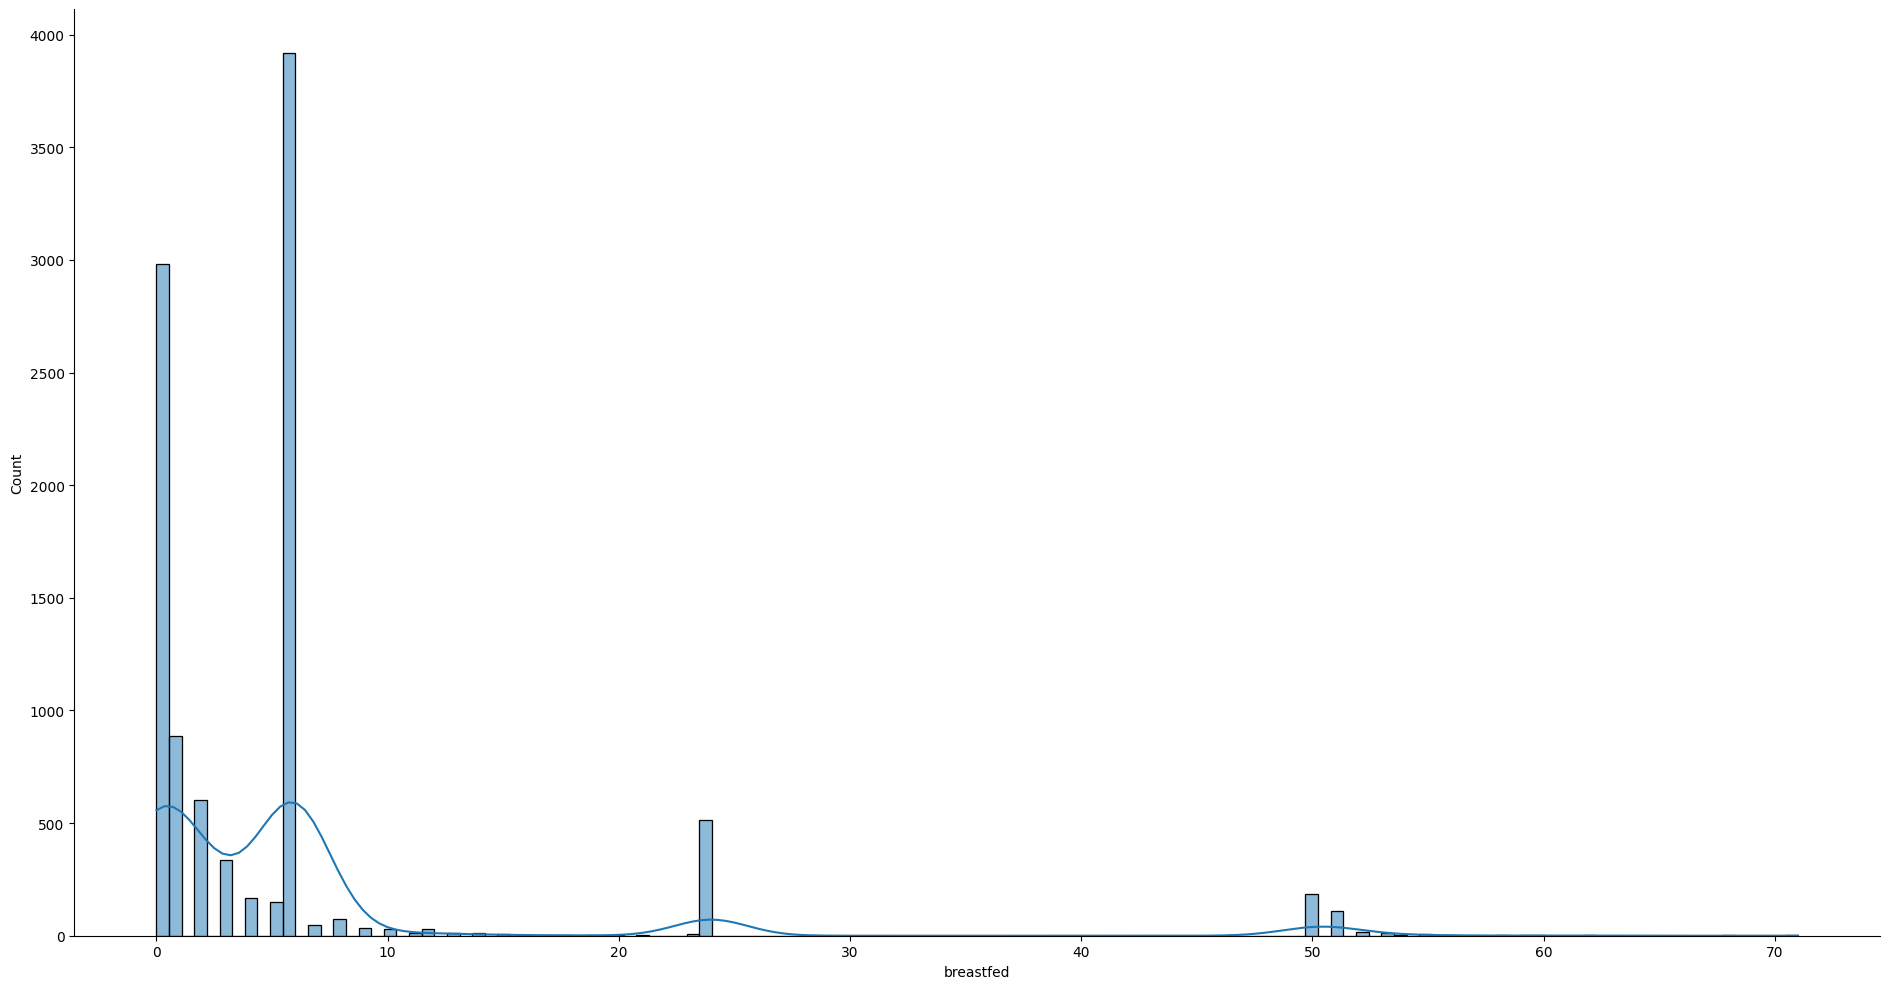

In [144]:
uni_breastfed_plot = sns.displot(df['breastfed'], kde=True, height=10, aspect=1.9)
uni_breastfed_plot.savefig("../img/univar_breastfed1.png", dpi=300)

### Check which fetures have still <10k rows


In [145]:
print(len(df) - df.isnull().sum())


age_group            10171
residence            10171
education            10171
wealth               10171
past_births          10171
1stbirth_age         10171
adj_hemo_altsmoke    10051
anemia_level         10051
net_available        10171
is_smoker            10171
marital_status       10171
partner_coliving      9653
breastfed            10171
fever_history        10171
adj_hemo_alt         10171
anemia_level1        10171
ironpill_taken       10171
dtype: int64


#### New feature based on age group :

Average each age group.

In [146]:
# age_group : {'20-24', '35-39', '25-29', '30-34', '15-19', '40-44', '45-49'}
raw_age_groups = col_uniq_vals['age_group']
mod_agegroups = {}
for group in raw_age_groups:
    age_start, age_end = list(map(int, group.split('-')))
    age_avg = (age_start + age_end)/2
    mod_agegroups[group] = age_avg
agegroup_mapper = lambda i: mod_agegroups[i]

In [147]:
df.age_group = df.age_group.apply(agegroup_mapper)

### DATA CLEANING VI: One hot encoding for categorical features

#### Decide for which columns to do one-hot encoding

In [148]:
cols2onehot_encode = [
    "residence", 
    "wealth", 
    "net_available",
    "is_smoker",
    "education", 
    "marital_status",
    "partner_coliving",
    "fever_history",
    "ironpill_taken",
]

#### Remap unique feature values for better one hot encoded feature name

In [149]:
# Unique residence values : ['Urban' 'Rural']
# Unique wealth values : ['Richest' 'Richer' 'Poorer' 'Middle' 'Poorest']
# Unique net_available values : ['Yes' 'No']
# Unique is_smoker values : ['Yes' 'No']
generic_mapper = lambda i: i.lower()

# Unique education values : ['Secondary' 'Higher' 'No education' 'Primary']
education_mapper = lambda i: i.lower() if len(i.split()) == 1 else 'no'

# Unique marital_status values : ['Married' 'Never in union' 'No longer living together/separated' 'Widowed' 'Living with partner' 'Divorced']
def marital_status_mapper(val):
    if len(val.split()) == 1:
        return val.lower()
    elif 'never' in val.lower():
        return 'never'
    elif 'separated' in val.lower():
        return 'separated'
    elif 'living with' in val.lower():
        return 'living'
    else:
        return 'unknown'

# Unique partner_coliving values : ['Living with her' 'Staying elsewhere' nan]
def partner_coliving_mapper(val):
    # NOTE : Only for this feature, we need to check for the nan values, as applying .lower() will yield error.
    if isinstance(val, str) and 'elsewhere' in val.lower():
        return 'elsewhere'
    elif isinstance(val, str) and 'living with' in val.lower():
        return 'yes'
    else:
        return 'unknown'

# Unique fever_history values : ['No' 'Yes' "Don't know"]
fever_hist_mapper = lambda i: i.lower() if len(i.split()) == 1 else 'unknown'

# Unique ironpill_taken : ['No' 'Yes' "Don't know"]
ironpill_taken_mapper = lambda i: i.lower() if len(i.split()) == 1 else 'unknown'

### Map new values for the features

In [150]:
df.residence = df.residence.apply(generic_mapper)
df.wealth = df.wealth.apply(generic_mapper)
df.net_available = df.net_available.apply(generic_mapper)
df.is_smoker = df.is_smoker.apply(generic_mapper)

df.education = df.education.apply(education_mapper)
df.marital_status = df.marital_status.apply(marital_status_mapper)
df.partner_coliving = df.partner_coliving.apply(partner_coliving_mapper)
df.fever_history = df.fever_history.apply(fever_hist_mapper)
df.ironpill_taken = df.ironpill_taken.apply(ironpill_taken_mapper)

#### One hot encoding for some feautures.

In [151]:
df = pd.get_dummies(df, columns=cols2onehot_encode)

In [152]:
# Cross-check the one-hot encoded columns
print(*df.columns, sep="\n")
df.head(5)

age_group
past_births
1stbirth_age
adj_hemo_altsmoke
anemia_level
breastfed
adj_hemo_alt
anemia_level1
residence_rural
residence_urban
wealth_middle
wealth_poorer
wealth_poorest
wealth_richer
wealth_richest
net_available_no
net_available_yes
is_smoker_no
is_smoker_yes
education_higher
education_no
education_primary
education_secondary
marital_status_divorced
marital_status_living
marital_status_married
marital_status_never
marital_status_separated
marital_status_widowed
partner_coliving_elsewhere
partner_coliving_unknown
partner_coliving_yes
fever_history_no
fever_history_unknown
fever_history_yes
ironpill_taken_no
ironpill_taken_unknown
ironpill_taken_yes


,age_group,past_births,1stbirth_age,adj_hemo_altsmoke,anemia_level,breastfed,adj_hemo_alt,anemia_level1,residence_rural,residence_urban,...,marital_status_widowed,partner_coliving_elsewhere,partner_coliving_unknown,partner_coliving_yes,fever_history_no,fever_history_unknown,fever_history_yes,ironpill_taken_no,ironpill_taken_unknown,ironpill_taken_yes
3,27.0,1,25,95.0,Moderate,5.000000,114.0,Not anemic,False,True,...,False,False,False,True,True,False,False,True,False,False
5,32.0,1,30,113.0,Mild,5.952867,119.0,Not anemic,False,True,...,False,False,False,True,True,False,False,True,False,False
6,37.0,2,32,121.0,Not anemic,0.000000,102.0,Mild,False,True,...,False,False,False,True,True,False,False,False,False,True
9,22.0,1,19,108.0,Moderate,0.000000,113.0,Not anemic,False,True,...,False,False,False,True,True,False,False,False,False,True
12,27.0,1,24,116.0,Mild,24.000000,109.0,Mild,False,True,...,False,False,False,True,True,False,False,True,False,False


### DATA PROCESSING VII: Feature Engineering

#### NEW FEATURE : Adjusted Hemoglobin per altitude and past birth history

In [153]:
df['adj_hemo_altbirth'] = df['adj_hemo_alt'] / df['past_births']


### EDA X: Correlation of adjusted hemoglobin per altitude and past birth history with anemia

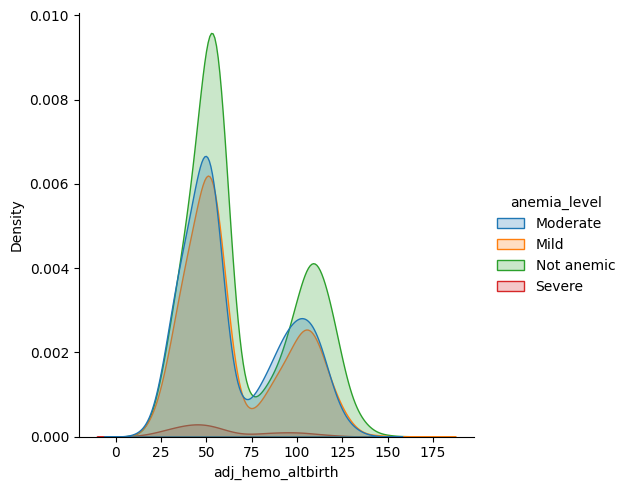

In [154]:
hemoaltsmkVanemia = sns.displot(df, x='adj_hemo_altbirth', hue="anemia_level", kind="kde", fill=True)
hemoaltsmkVanemia.savefig("../img/hypo_hemoaltbirthVanemia.png", dpi=300)

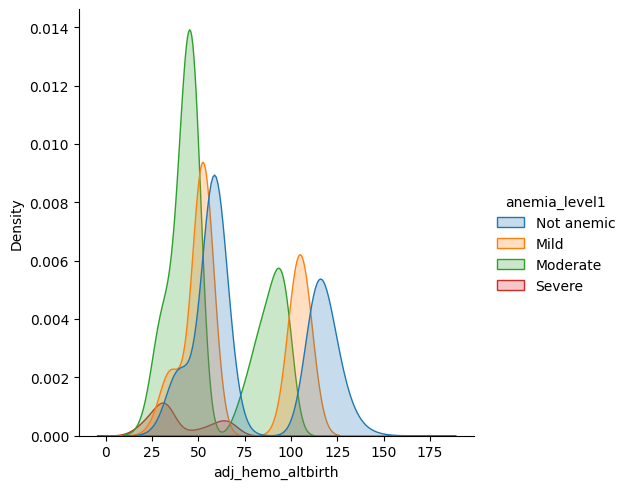

In [155]:
hemoaltsmkVanemia = sns.displot(df, x='adj_hemo_altbirth', hue="anemia_level1", kind="kde", fill=True)
hemoaltsmkVanemia.savefig("../img/hypo_hemoaltbirthVanemia1.png", dpi=300)

### DATA PROCESSING VIII: Feature Engineering 2

#### NEW FEATURE : Adjusted Hemoglobin per altitude, smoke and past birth history

In [156]:
df['adj_hemo_altsmkbirth'] = df['adj_hemo_altsmoke'] / df['past_births']


### EDA XI: Correlation of adjusted hemoglobin per altitude, smoke and past birth history with anemia

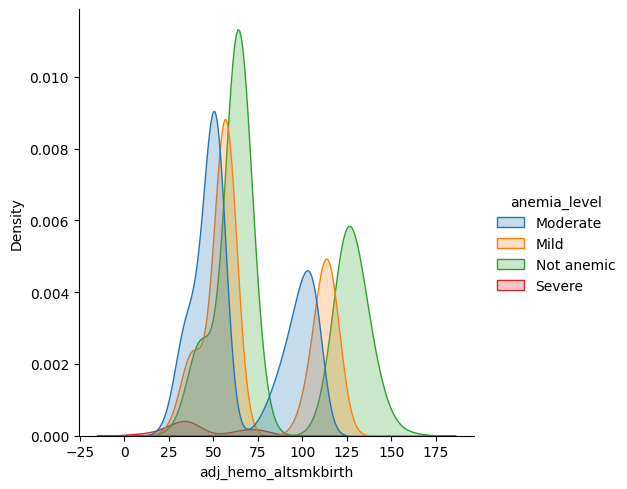

In [157]:
hemoaltsmkVanemia = sns.displot(df, x='adj_hemo_altsmkbirth', hue="anemia_level", kind="kde", fill=True)
hemoaltsmkVanemia.savefig("../img/hypo_hemoaltsmkbirthVanemia.png", dpi=300)

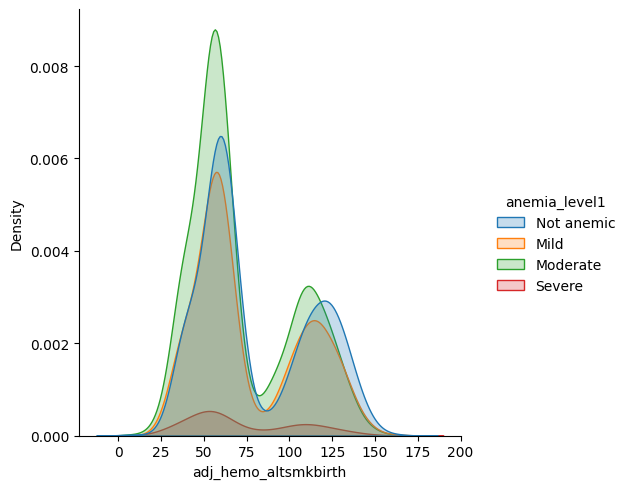

In [158]:
hemoaltsmkVanemia = sns.displot(df, x='adj_hemo_altsmkbirth', hue="anemia_level1", kind="kde", fill=True)
hemoaltsmkVanemia.savefig("../img/hypo_hemoaltsmkbirthVanemia1.png", dpi=300)

### DATA PROCESSING IX: Feature Engineering 3

#### NEW FEATURE : Healthy family and relationships

In [159]:
df['family'] = (df.marital_status_living + df.marital_status_married) & df.partner_coliving_yes

### EDA XII: Univariate Analysis on engineered features

#### Check whether child is living in a family or not

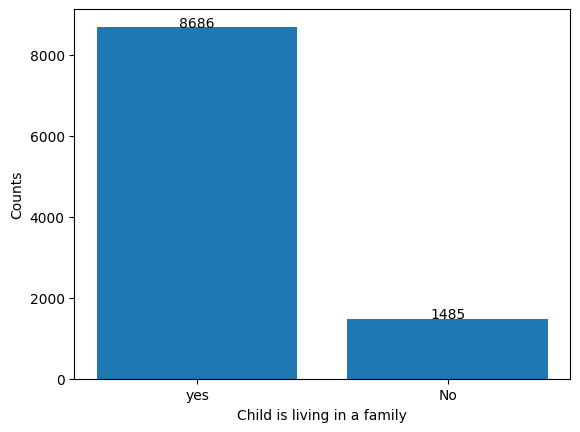

In [160]:
data = df['family'].value_counts().reset_index(name='counts')
fig, ax = plt.subplots()
data.family = data.family.apply(lambda i: "yes" if i else "No")
# print(data)
bars = ax.bar(data.family, data.counts)
for b in bars:
    h = b.get_height()
    w = b.get_width()
    ax.text(
        x=b.get_x() + w / 2, 
        y=h,
        s=f"{h}",
        ha="center",
    )
plt.xlabel('Child is living in a family')
plt.ylabel('Counts')
plt.savefig("../img/univar_family.png", dpi=300)
plt.show()

### EDA XIII: Bivariate Analysis on engineered features

#### Correlation of family life and anemia

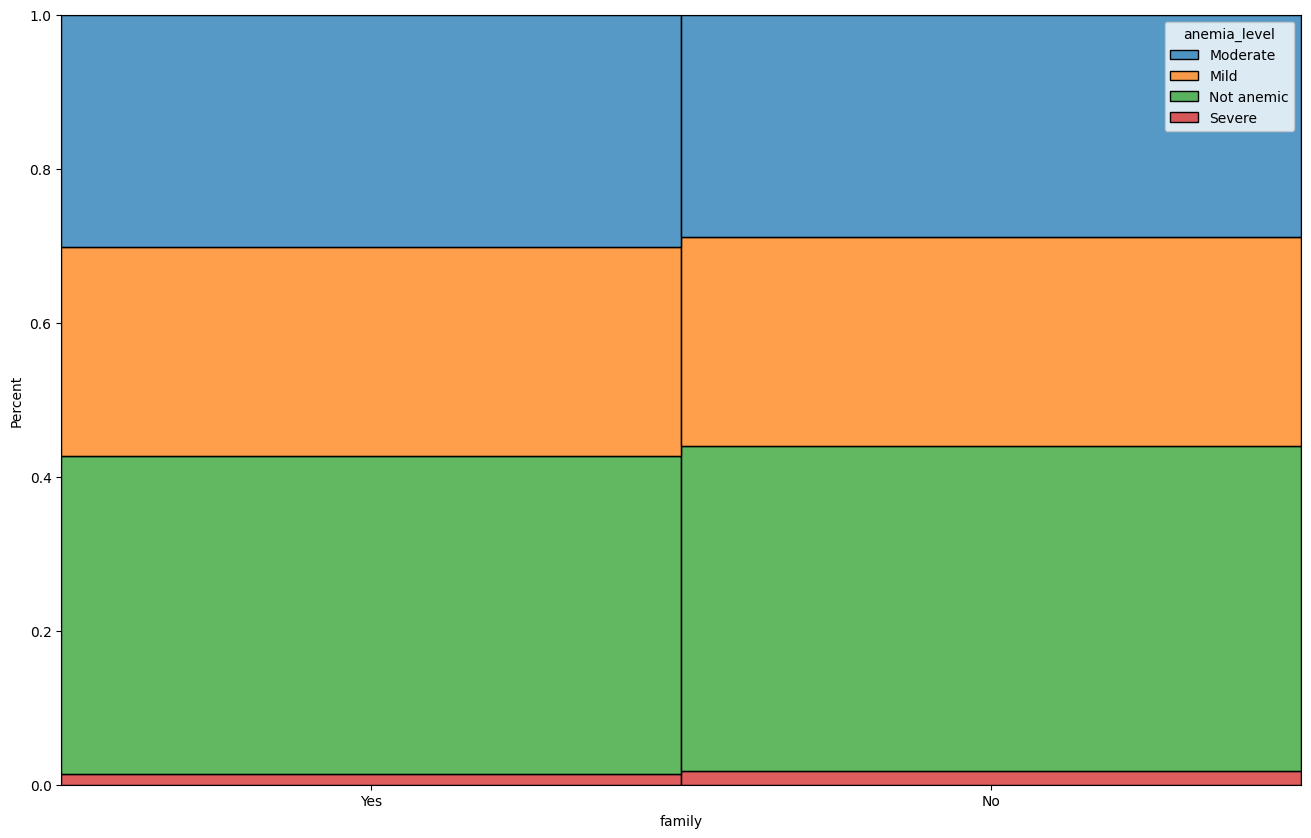

In [161]:
plt.figure(figsize=(16, 10))
# NOTE : Don't modify the cleaned data to run some hypothesis testing
dummy_df = deepcopy(df)
dummy_df.family = dummy_df.family.apply(lambda i: "Yes" if i else "No")

resiVanemia = sns.histplot(dummy_df, x='family', hue='anemia_level', multiple='fill', stat="percent")
plt.savefig("../img/hypo_familyVanemic.png", dpi=300)
plt.show()

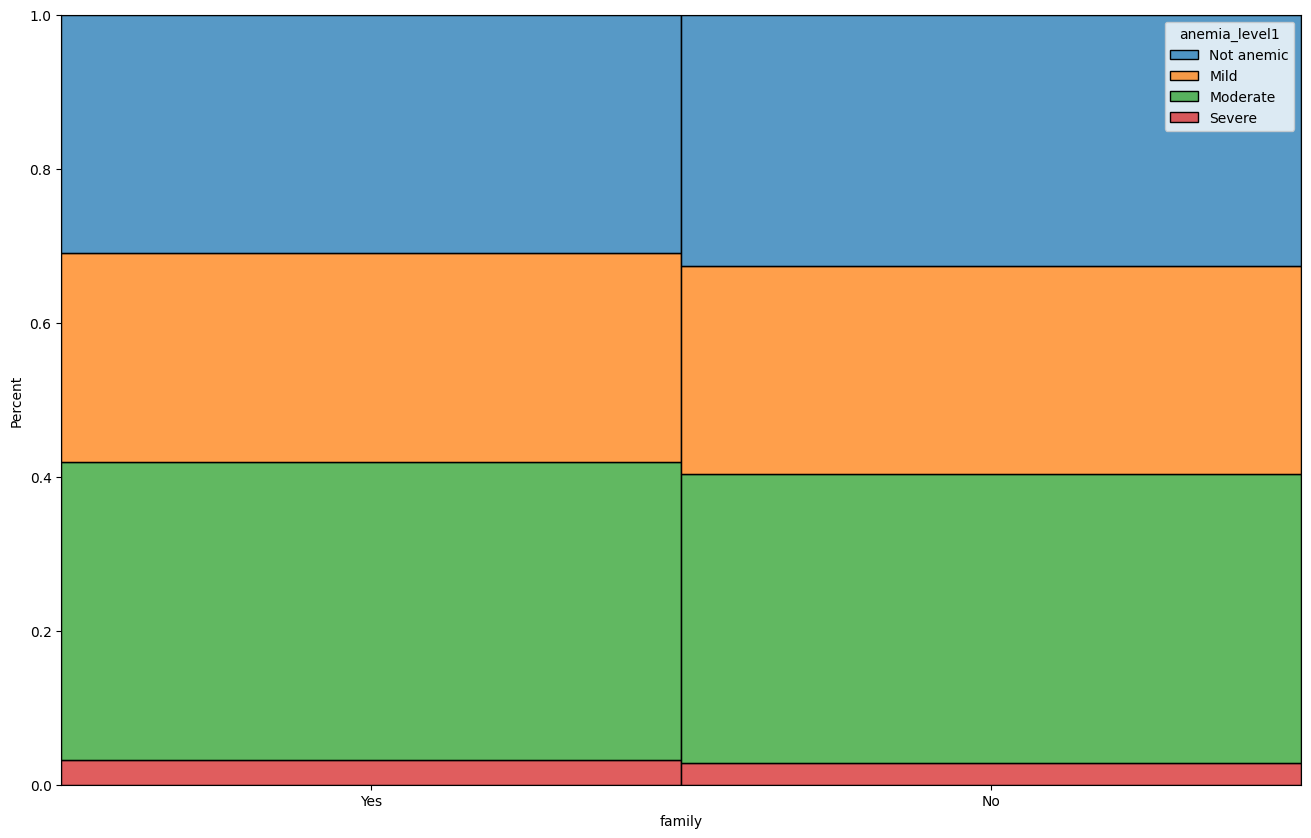

In [162]:
plt.figure(figsize=(16, 10))
# NOTE : Don't modify the cleaned data to run some hypothesis testing
dummy_df = deepcopy(df)
dummy_df.family = dummy_df.family.apply(lambda i: "Yes" if i else "No")

resiVanemia = sns.histplot(dummy_df, x="family", hue="anemia_level1", multiple="fill", stat="percent")
plt.savefig("../img/hypo_familyVanemic1.png", dpi=300)
plt.show()

### DATA PROCESSING X: Label encode the predictor variable

In [163]:
anemia_level_mapper = {"Moderate" : 3, "Mild" : 2, 'Not anemic' : 1, "Severe" : 4}
df.anemia_level = df.anemia_level.apply(lambda i: anemia_level_mapper.get(i, 0))

# NOTE: Both the mapper are same, but let's keep them separate as of now
anemia_level_mapper1 = {"Not anemic" : 1, "Mild" : 2, "Moderate" : 3, "Severe" : 4}
df.anemia_level1 = df.anemia_level1.apply(lambda i: anemia_level_mapper1.get(i, 0))

### Save the cleaned data

In [164]:
df.to_csv("../data/children_anemia_cleaned.csv", index=False)

In [165]:
# Display the first few rows of the cleaned dataset
df.head()

,age_group,past_births,1stbirth_age,adj_hemo_altsmoke,anemia_level,breastfed,adj_hemo_alt,anemia_level1,residence_rural,residence_urban,...,partner_coliving_yes,fever_history_no,fever_history_unknown,fever_history_yes,ironpill_taken_no,ironpill_taken_unknown,ironpill_taken_yes,adj_hemo_altbirth,adj_hemo_altsmkbirth,family
3,27.0,1,25,95.0,3,5.000000,114.0,1,False,True,...,True,True,False,False,True,False,False,114.0,95.0,True
5,32.0,1,30,113.0,2,5.952867,119.0,1,False,True,...,True,True,False,False,True,False,False,119.0,113.0,True
6,37.0,2,32,121.0,1,0.000000,102.0,2,False,True,...,True,True,False,False,False,False,True,51.0,60.5,True
9,22.0,1,19,108.0,3,0.000000,113.0,1,False,True,...,True,True,False,False,False,False,True,113.0,108.0,True
12,27.0,1,24,116.0,2,24.000000,109.0,2,False,True,...,True,True,False,False,True,False,False,109.0,116.0,True


In [166]:
# For loading into latex
# df_head = df.head().to_string()
splitter = [0, 7, 12, 17, 22, 26, 30, 34, ]
chunk_cols = 6
dfhead_chunks = []
with open('../data/cleaned_dfhead.txt', "w") as f:
    for i, j in zip(splitter, splitter[1:]):
        # cols_ = df.columns[n*6:(n+1)*6]
        cols_ = df.columns[i:j]
        df_chunk = df[cols_]
        df_chunk_str = df_chunk.head().to_string()
        f.write(df_chunk_str + "\n")

### EDA XIV: Clustering for Pattern Identification 


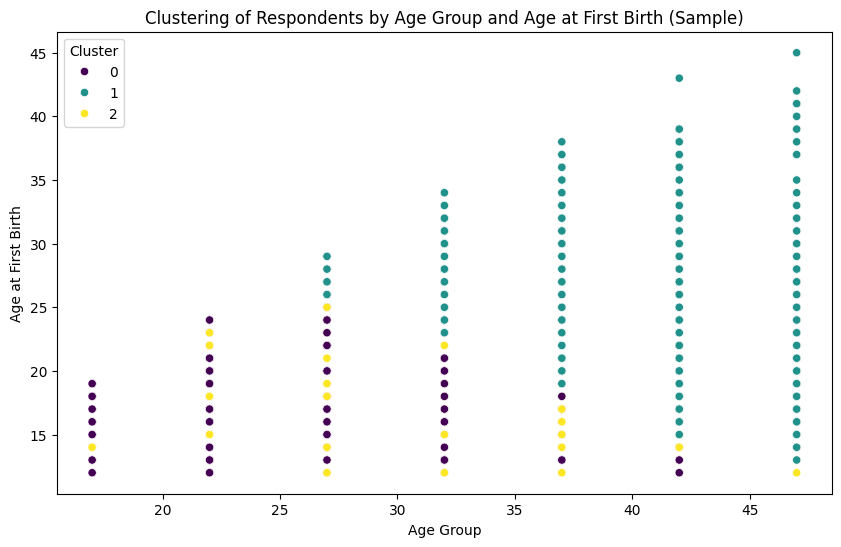

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

simpler_clustering_columns = ['age_group', '1stbirth_age', 'adj_hemo_altsmoke']
simpler_clustering_data = df[simpler_clustering_columns].dropna()

scaler = StandardScaler()

simpler_data_scaled = scaler.fit_transform(simpler_clustering_data)

kmeans_simple = KMeans(n_clusters=3, random_state=42)
clusters_simple = kmeans_simple.fit_predict(simpler_data_scaled[:])

simpler_clustering_data.loc[:, 'Cluster'] = clusters_simple

plt.figure(figsize=(10, 6))
sns.scatterplot(x=simpler_clustering_data['age_group'], y=simpler_clustering_data['1stbirth_age'], hue=simpler_clustering_data['Cluster'], palette='viridis', legend='full')
plt.title('Clustering of Respondents by Age Group and Age at First Birth (Sample)')
plt.xlabel('Age Group')
plt.ylabel('Age at First Birth')
plt.legend(title='Cluster')
plt.savefig("../img/eda_clustering.png", dpi=300)
plt.show()

### EDA XV: Principal Component Analysis 

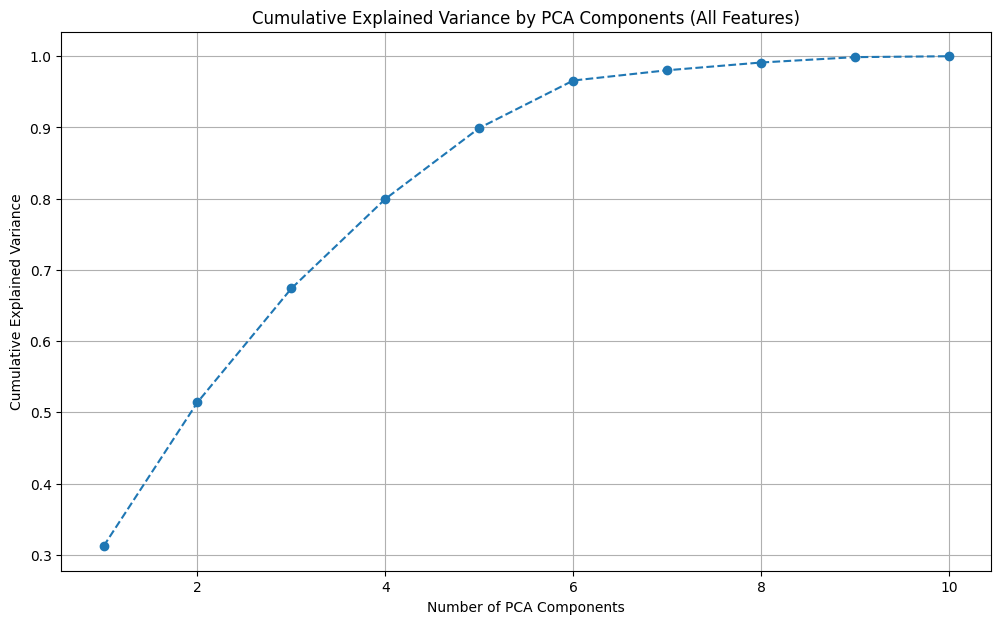

{1: 0.31194169490049173,
 2: 0.514058033565395,
 3: 0.6739830025119224,
 4: 0.7996200715249121,
 5: 0.899227520020905,
 6: 0.9658861404992901,
 7: 0.9802861125617744,
 8: 0.99117382372073,
 9: 0.9987078715145975,
 10: 0.9999999999999999}

In [168]:
from sklearn.decomposition import PCA

numerical_data = df.select_dtypes(include=[np.number]).dropna()

numerical_data_scaled = scaler.fit_transform(numerical_data)

pca_all_features = PCA()
pca_all_features_result = pca_all_features.fit_transform(numerical_data_scaled)

cumulative_variance_all_features = np.cumsum(pca_all_features.explained_variance_ratio_)

plt.figure(figsize=(12, 7))
plt.plot(range(1, len(cumulative_variance_all_features) + 1), cumulative_variance_all_features, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components (All Features)')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig("../img/eda_pca.png", dpi=300)
plt.show()

cumulative_variance_key_points = {i: var for i, var in enumerate(cumulative_variance_all_features[:20], start=1)}
cumulative_variance_key_points


### EDA XVI: Feature Importance Analysis

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = numerical_data.drop('anemia_level', axis=1)
y = numerical_data['anemia_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_classifier.fit(X_train, y_train)

feature_importance = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df


,Feature,Importance
0,adj_hemo_altsmoke,0.601642
1,adj_hemo_altsmkbirth,0.213129
2,adj_hemo_altbirth,0.043742
3,1stbirth_age,0.035449
4,adj_hemo_alt,0.034388
5,past_births,0.023312
6,age_group,0.021416
7,breastfed,0.020259
8,anemia_level1,0.006664


In [170]:
featimp = feature_importance_df.to_string()
with open('../data/featimp.txt', "w") as f:
    f.write(featimp)

### EDA XVII: Outlier Detection

In [171]:
def detect_outliers_iqr(data, feature_names):
    outlier_indices = []

    for feature in feature_names:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = data[(data[feature] < Q1 - 1.5 * IQR) | (data[feature] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return data.loc[outlier_indices]

outliers = detect_outliers_iqr(numerical_data, ['adj_hemo_altsmoke', 'adj_hemo_altsmkbirth'])

outliers_summary = outliers[['adj_hemo_altsmoke', 'adj_hemo_altsmkbirth']].describe()

outliers_count = len(outliers)
outliers_summary, outliers_count


(       adj_hemo_altsmoke  adj_hemo_altsmkbirth
 count         145.000000            145.000000
 mean           82.993103             56.469540
 std            41.088741             38.148170
 min            20.000000              6.666667
 25%            62.000000             32.000000
 50%            70.000000             37.000000
 75%            74.000000             73.000000
 max           218.000000            167.000000,
 145)

In [172]:
cleaned_data_without_outliers = numerical_data.drop(outliers.index)

adjusted_summary = cleaned_data_without_outliers.describe()

remaining_data_count = len(cleaned_data_without_outliers)

adjusted_summary, remaining_data_count


(         age_group  past_births  1stbirth_age  adj_hemo_altsmoke  \
 count  9906.000000  9906.000000   9906.000000        9906.000000   
 mean     30.402988     1.774884     19.981425         115.109731   
 std       6.856761     0.679400      4.444152          14.560059   
 min      17.000000     1.000000     12.000000          75.000000   
 25%      27.000000     1.000000     17.000000         106.000000   
 50%      32.000000     2.000000     19.000000         115.000000   
 75%      37.000000     2.000000     22.000000         125.000000   
 max      47.000000     6.000000     45.000000         154.000000   
 
        anemia_level    breastfed  adj_hemo_alt  anemia_level1  \
 count   9906.000000  9906.000000   9906.000000    9906.000000   
 mean       1.895417     5.937694    101.358974       2.131435   
 std        0.853396    10.013725     15.492518       0.895153   
 min        1.000000     0.000000     29.000000       1.000000   
 25%        1.000000     0.000000     92.000000

In [173]:
# Save the outputs in txt file to load into latex report
outl_sum = outliers_summary.to_string()
with open('../data/outlier_summary.txt', "w") as f:
    f.write(outl_sum)

chunk_size = 4
with open('../data/adjstd_summary.txt', "w") as f:
    for n in range(len(adjusted_summary.columns)//chunk_size + 1):
        cols_ = adjusted_summary.columns[n*chunk_size:(n+1)*chunk_size]
        df_chunk = adjusted_summary[cols_]
        df_chunk_str = df_chunk.head().to_string()
        f.write(df_chunk_str + "\n")


### EDA XVIII: Correlation Analysis

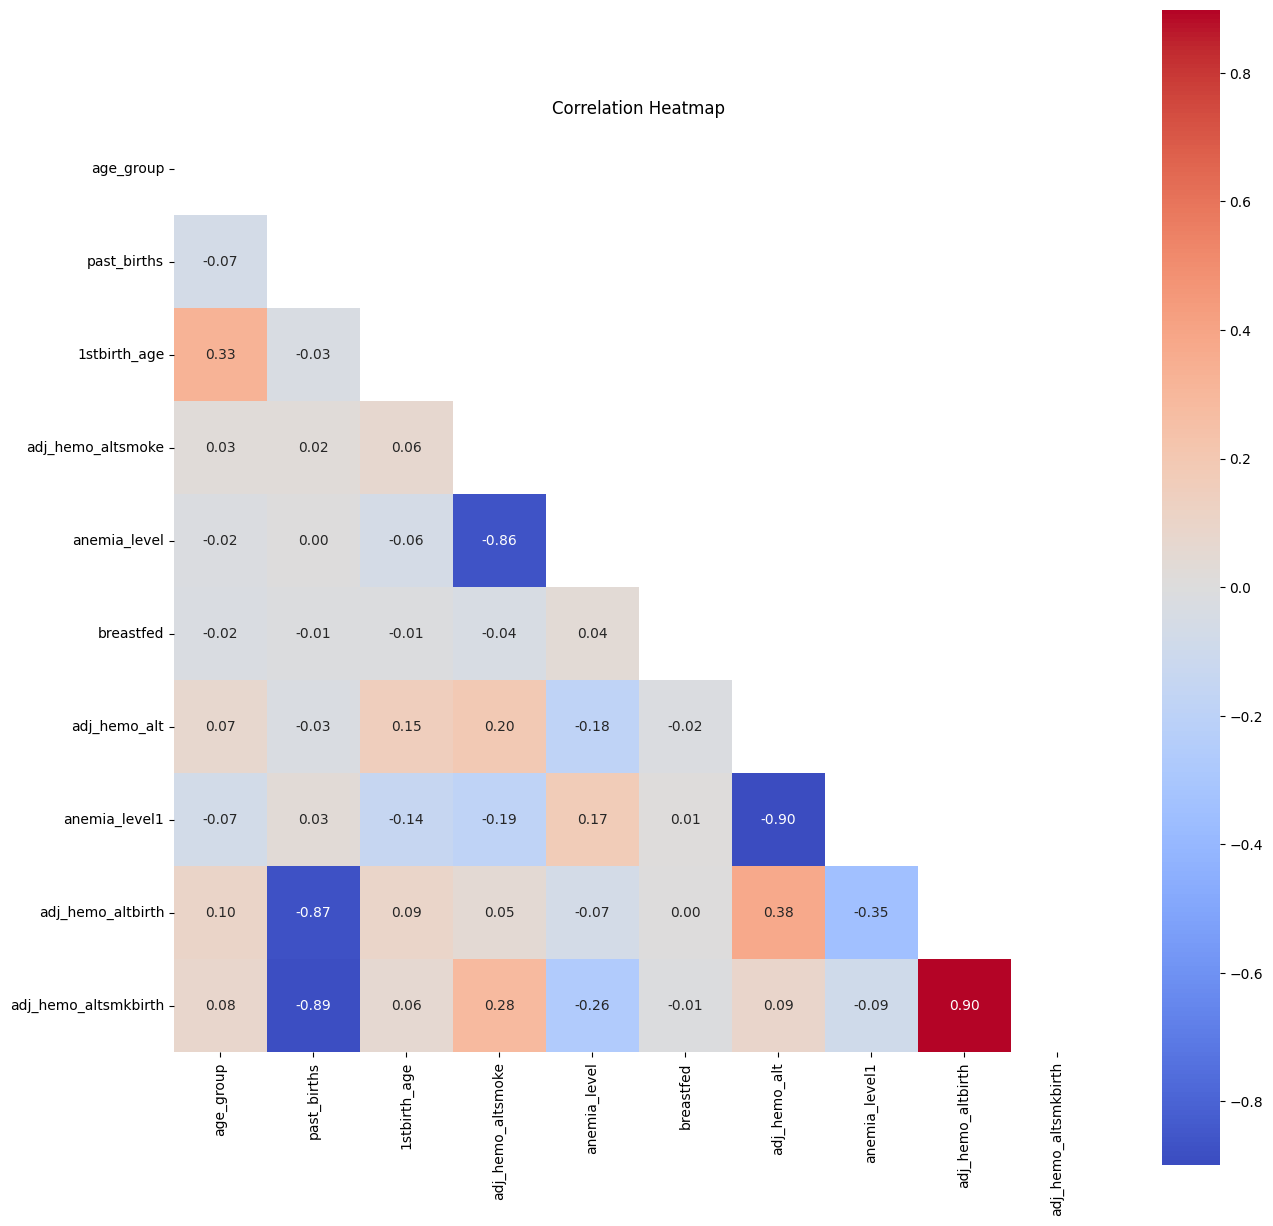

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

corr2 = cleaned_data_without_outliers.corr()
mask2 = np.triu(np.ones_like(corr2, dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(corr2, mask=mask2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig("../img/corr_heatmap_cleaned.png", dpi=300)
plt.show()
